## Klasifikasi Nilai Akhir Siswa SMA

### **Masalah**

Prestasi akademik siswa merupakan indikator penting dalam sistem pendidikan yang mempengaruhi masa depan dan peluang karir mereka. Faktor-faktor yang mempengaruhi prestasi akademik sangat kompleks dan beragam, mulai dari karakteristik demografis, kebiasaan belajar, dukungan orang tua, hingga partisipasi dalam aktivitas ekstrakurikuler. Identifikasi dini siswa yang berisiko mendapat prestasi rendah (grade D atau F) sangat krusial untuk memberikan intervensi yang tepat waktu, seperti program tutoring tambahan, konseling akademik, atau dukungan psikososial. Sayangnya, proses identifikasi ini masih sering dilakukan secara manual dan subjektif oleh guru dan konselor, yang rentan terhadap bias dan keterlambatan deteksi. Dengan demikian, notebook ini berupaya mengotomatisasi masalah prediksi prestasi akademik siswa menggunakan machine learning untuk membantu institusi pendidikan dalam mengalokasikan sumber daya dengan lebih efektif dan memberikan dukungan yang tepat sasaran kepada siswa

### **Tujuan** 

Mengklasifikasikan prestasi akademik siswa berdasarkan attribut dari dataset.

### **Attribut Dataset**

Dataset ini berisi 2392 record siswa SMA dengan 15 atribut yang mencakup berbagai aspek kehidupan akademik dan personal siswa. Berikut penjelasan setiap atribut:

**Identifikasi Siswa:**
- **StudentID**: Identifier unik untuk setiap siswa (range: 1001-3392)

**Karakteristik Demografis:**
- **Age**: Usia siswa dalam tahun (range: 15-18 tahun)
- **Gender**: Jenis kelamin siswa (Male/Female)
- **Ethnicity**: Latar belakang etnis siswa (Caucasian, African American, Asian, Other)

**Latar Belakang Keluarga:**
- **ParentalEducation**: Tingkat pendidikan orang tua (None, High School, Some College, Bachelor's, Higher)
- **ParentalSupport**: Tingkat dukungan orang tua terhadap pendidikan (None, Low, Moderate, High, Very High)

**Kebiasaan Belajar:**
- **StudyTimeWeekly**: Waktu belajar per minggu dalam jam (range: 0-20 jam)
- **Absences**: Jumlah ketidakhadiran selama tahun ajaran (range: 0-30 hari)
- **Tutoring**: Status mengikuti bimbingan belajar tambahan (Yes/No)

**Aktivitas Ekstrakurikuler:**
- **Extracurricular**: Partisipasi dalam kegiatan ekstrakurikuler (Yes/No)
- **Sports**: Partisipasi dalam kegiatan olahraga (Yes/No)
- **Music**: Partisipasi dalam kegiatan musik (Yes/No)
- **Volunteering**: Partisipasi dalam kegiatan volunteering (Yes/No)

**Prestasi Akademik:**
- **GPA**: Grade Point Average pada skala 2.0-4.0
- **GradeClass**: Klasifikasi prestasi akademik berdasarkan GPA (A: ≥3.5, B: 3.0-3.4, C: 2.5-2.9, D: 2.0-2.4, F: <2.0)

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('../dataset/Student_corrected.csv')

In [3]:
df.head(5)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Female,Caucasian,Some College,19.833723,7,Yes,Moderate,No,No,Yes,No,2.929196,C
1,1002,18,Male,Caucasian,High School,15.408756,0,No,Low,No,No,No,No,3.042915,B
2,1003,15,Male,Asian,Bachelor's,4.210570,26,No,Moderate,No,No,No,No,0.112602,F
3,1004,17,Female,Caucasian,Bachelor's,10.028829,14,No,High,Yes,No,No,No,2.054218,D
4,1005,17,Female,Caucasian,Some College,4.672495,17,Yes,High,No,No,No,No,1.288061,F


In [4]:
df.duplicated().sum()

0

In [5]:
print("=== STUDENT DATASET INFORMATION ===")
print(f"Dataset Shape: {df.shape}")
print(f"Total Students: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")
print()
print("=== DATASET COLUMNS ===")
print(df.columns.tolist())

=== STUDENT DATASET INFORMATION ===
Dataset Shape: (2392, 15)
Total Students: 2392
Total Features: 15

=== DATASET COLUMNS ===
['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA', 'GradeClass']


In [6]:
df.info()
numerical_features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
categorical_features = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 
                       'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2149 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   object 
 8   ParentalSupport    2180 non-null   object 
 9   Extracurricular    2392 non-null   object 
 10  Sports             2392 non-null   object 
 11  Music              2392 non-null   object 
 12  Volunteering       2392 non-null   object 
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 280.4+ KB


#### FITUR NUMERIK

##### Distribusi

In [7]:
print("\n=== FITUR NUMERIK ===")
df[numerical_features].describe().T


=== FITUR NUMERIK ===


,count,mean,std,min,25%,50%,75%,max
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
GPA,2392.0,1.906186,0.915156,0.000000,1.174803,1.893393,2.622216,4.000000



 PERSEBARAN FITUR NUMERIK


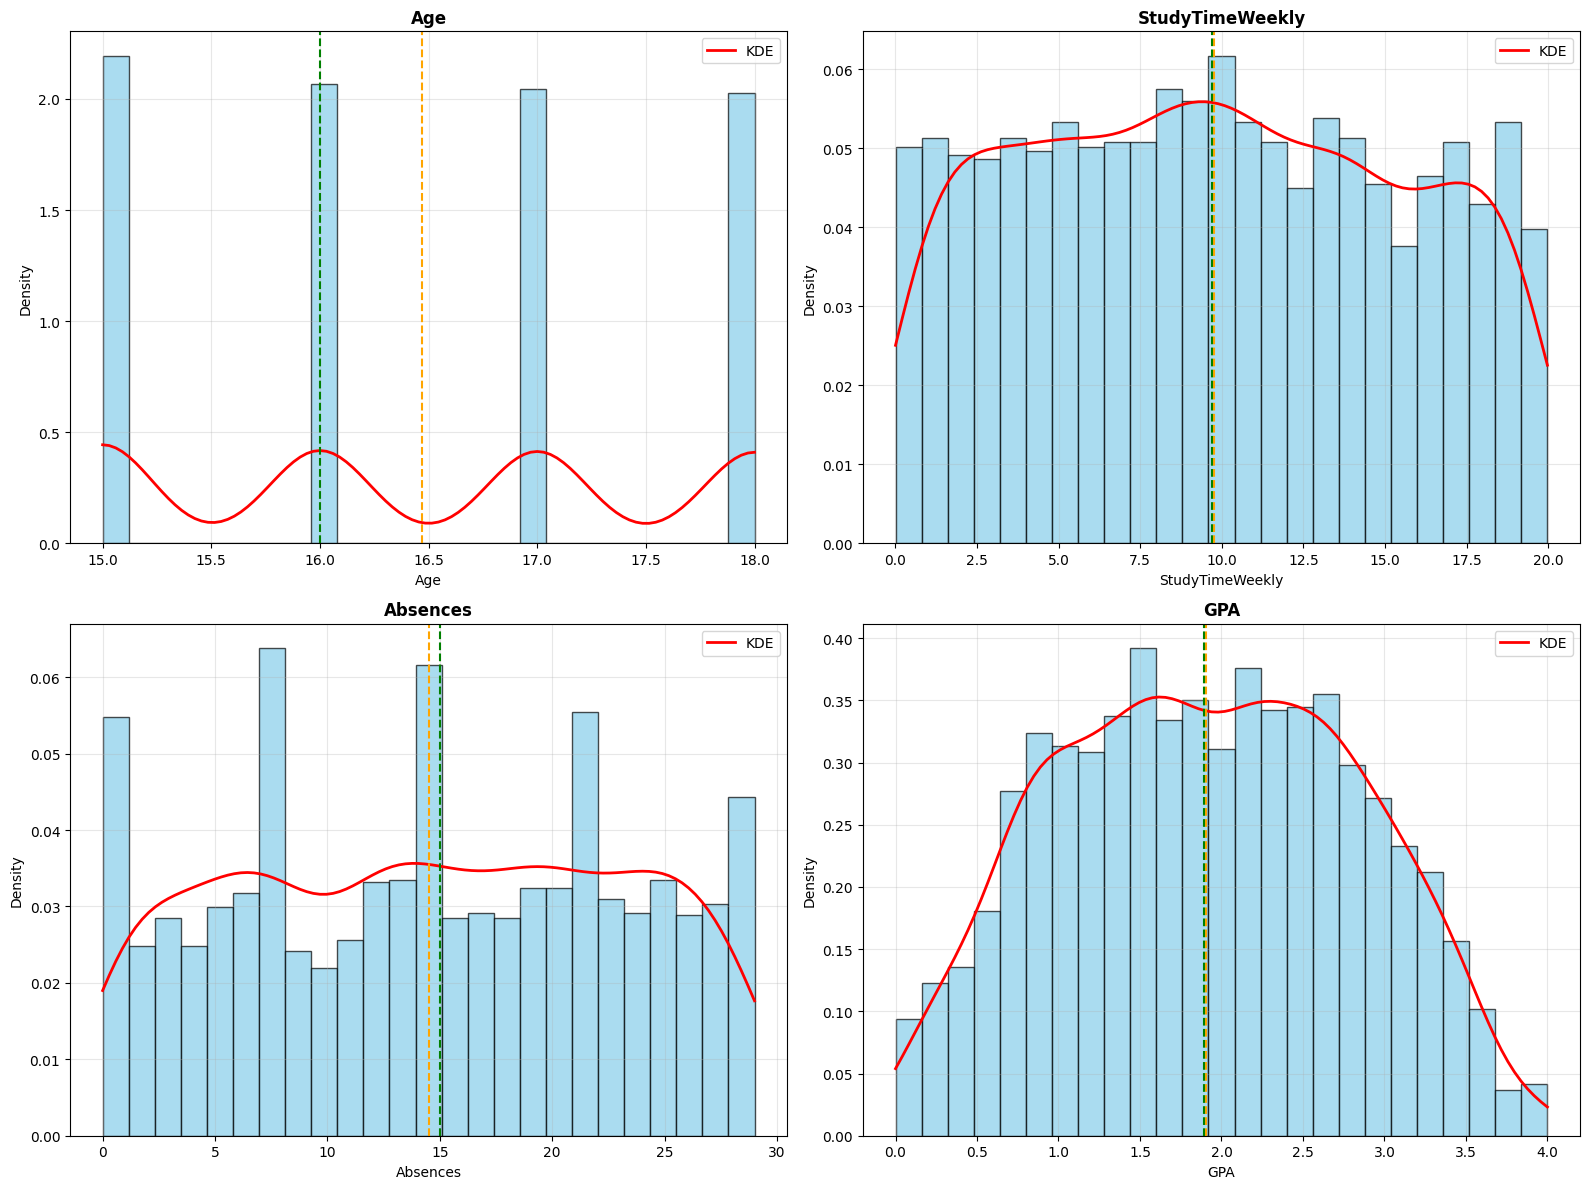

In [8]:
print("\n PERSEBARAN FITUR NUMERIK")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=25, alpha=0.7, density=True, color='skyblue', edgecolor='black')

    x = np.linspace(df[feature].min(), df[feature].max(), 100)
    kde = stats.gaussian_kde(df[feature])
    axes[i].plot(x, kde(x), 'r-', linewidth=2, label='KDE')
    
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    # Stats
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='orange', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

plt.tight_layout()
plt.show()

##### Outlier Detection


 BOXPLOT DETEKSI OUTLIER


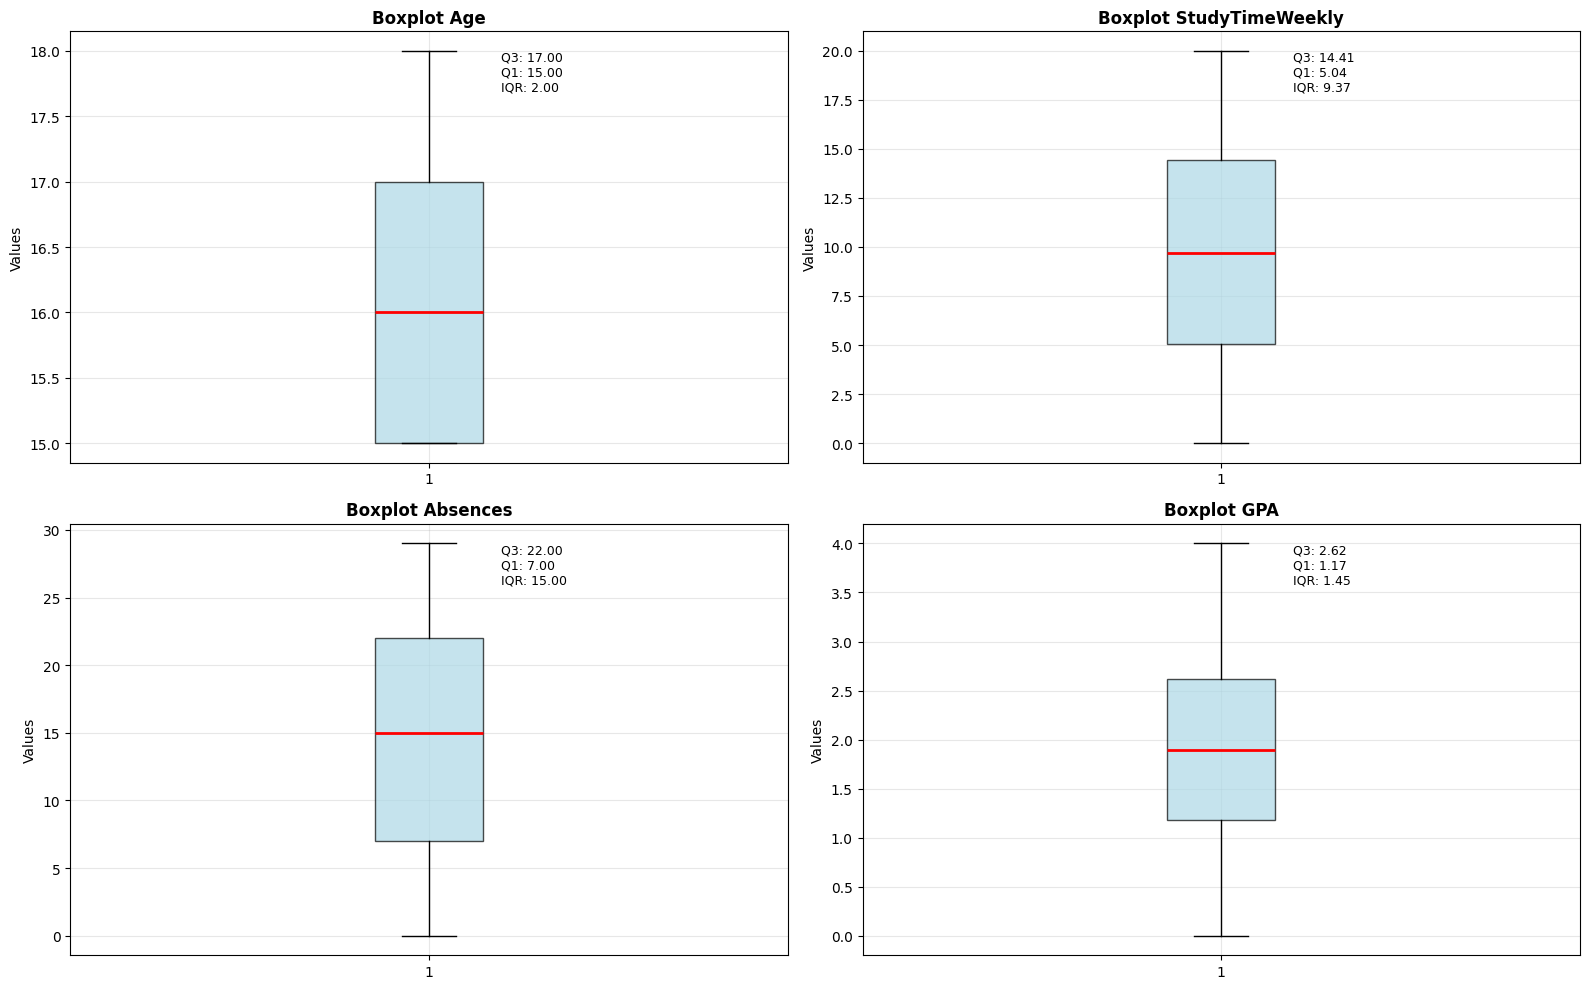

In [9]:
# Deteksi Outlier dengan boxplot
print("\n BOXPLOT DETEKSI OUTLIER")
print("=" * 40)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    # Boxplot
    box_plot = axes[i].boxplot(df[feature], patch_artist=True, 
                              boxprops=dict(facecolor='lightblue', alpha=0.7),
                              medianprops=dict(color='red', linewidth=2))
    
    axes[i].set_title(f'Boxplot {feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Values')
    axes[i].grid(True, alpha=0.3)
    
    # Tambahkan statistik pada plot
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    axes[i].text(1.1, df[feature].max(), f'Q3: {Q3:.2f}\nQ1: {Q1:.2f}\nIQR: {IQR:.2f}', 
                verticalalignment='top', fontsize=9)

plt.tight_layout()
plt.show()

In [10]:
# Deteksi outlier dengan IQR 
print("\n DETEKSI OUTLIER MENGGUNAKAN IQR")
print("=" * 50)


for feature in numerical_features:
    print(f"\n {feature.upper()}")
    print("-" * 30)
    
    # Hitung quartile dan IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Hitung batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    
    print(f"Q1 (25th percentile): {Q1:.3f}")
    print(f"Q3 (75th percentile): {Q3:.3f}")
    print(f"IQR                 : {IQR:.3f}")
    print(f"Lower Bound         : {lower_bound:.3f}")
    print(f"Upper Bound         : {upper_bound:.3f}")
    print(f"Outlier Count       : {outlier_count}")
    print(f"Outlier Percentage  : {outlier_percentage:.2f}%")
    
    if outlier_count > 0:
        print(f"Outlier Range       : {outliers[feature].min():.3f} to {outliers[feature].max():.3f}")


 DETEKSI OUTLIER MENGGUNAKAN IQR

 AGE
------------------------------
Q1 (25th percentile): 15.000
Q3 (75th percentile): 17.000
IQR                 : 2.000
Lower Bound         : 12.000
Upper Bound         : 20.000
Outlier Count       : 0
Outlier Percentage  : 0.00%

 STUDYTIMEWEEKLY
------------------------------
Q1 (25th percentile): 5.043
Q3 (75th percentile): 14.408
IQR                 : 9.365
Lower Bound         : -9.005
Upper Bound         : 28.456
Outlier Count       : 0
Outlier Percentage  : 0.00%

 ABSENCES
------------------------------
Q1 (25th percentile): 7.000
Q3 (75th percentile): 22.000
IQR                 : 15.000
Lower Bound         : -15.500
Upper Bound         : 44.500
Outlier Count       : 0
Outlier Percentage  : 0.00%

 GPA
------------------------------
Q1 (25th percentile): 1.175
Q3 (75th percentile): 2.622
IQR                 : 1.447
Lower Bound         : -0.996
Upper Bound         : 4.793
Outlier Count       : 0
Outlier Percentage  : 0.00%


##### Fitur vs Target


 HISTOGRAM FITUR NUMERIK BERDASARKAN GRADECLASS


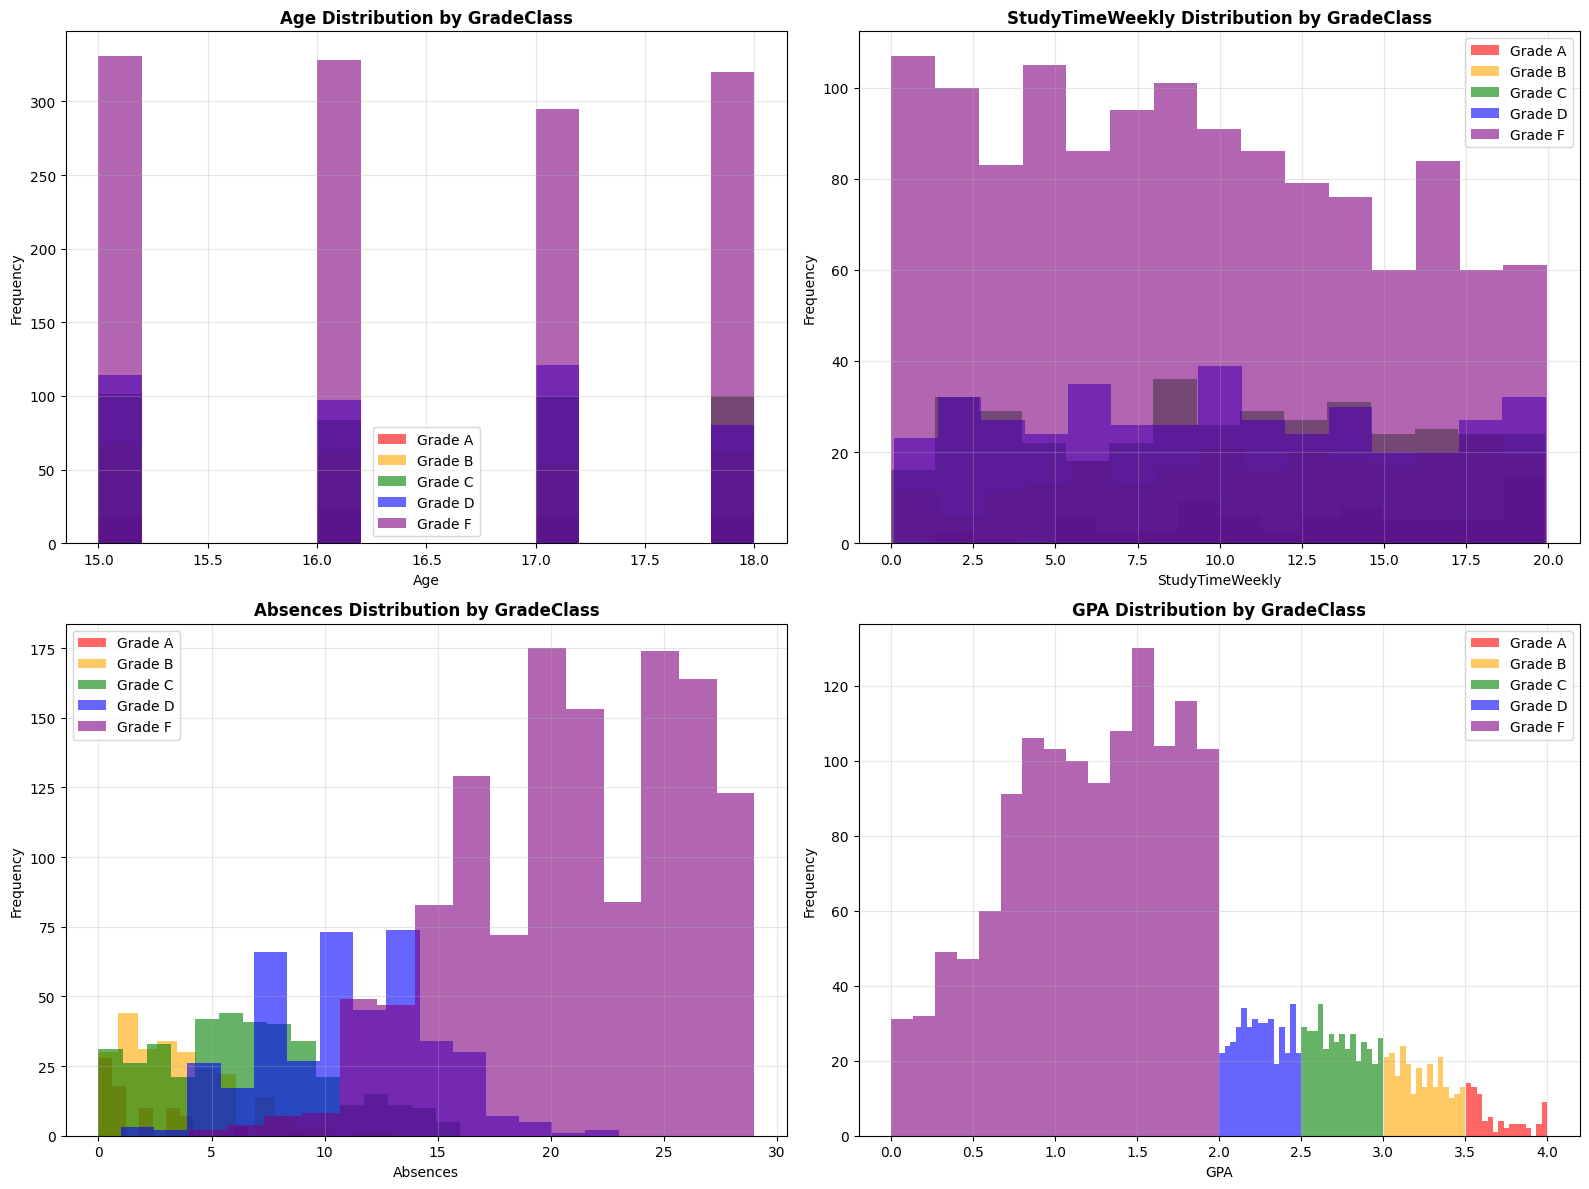

In [11]:
print(f"\n HISTOGRAM FITUR NUMERIK BERDASARKAN GRADECLASS")
print("=" * 55)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

grades = df['GradeClass'].unique()
colors = ['red', 'orange', 'green', 'blue', 'purple']

for i, feature in enumerate(numerical_features):
    for j, grade in enumerate(sorted(grades)):
        grade_data = df[df['GradeClass'] == grade][feature]
        axes[i].hist(grade_data, alpha=0.6, label=f'Grade {grade}', 
                    bins=15, color=colors[j])
    
    axes[i].set_title(f'{feature} Distribution by GradeClass', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

##### Korelasi

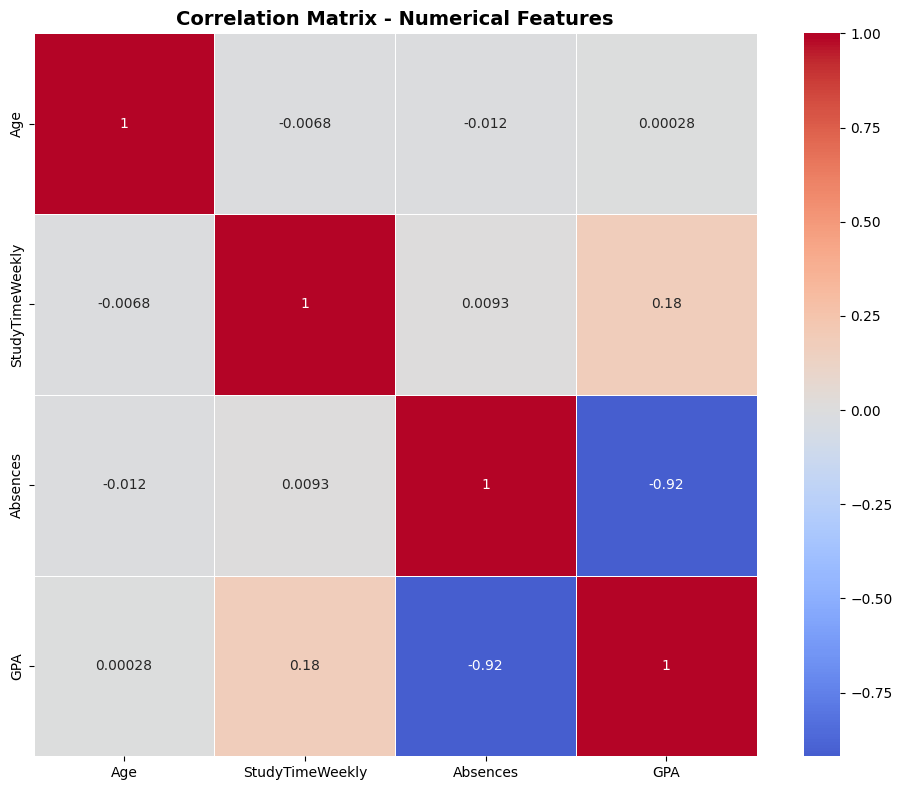

In [12]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### FITUR KATEGORIK

##### Distribusi

In [13]:
print("\n=== FITUR KATEGORIK ===")
df[categorical_features].describe().T


=== FITUR KATEGORIK ===


,count,unique,top,freq
Gender,2392,2,Female,1222
Ethnicity,2392,4,Caucasian,1207
ParentalEducation,2149,4,Some College,934
ParentalSupport,2180,4,Moderate,740
Tutoring,2392,2,No,1671
Extracurricular,2392,2,No,1475
Sports,2392,2,No,1666
Music,2392,2,No,1921
Volunteering,2392,2,No,2016
GradeClass,2392,5,F,1274



 PERSEBARAN FITUR KATEGORIKAL


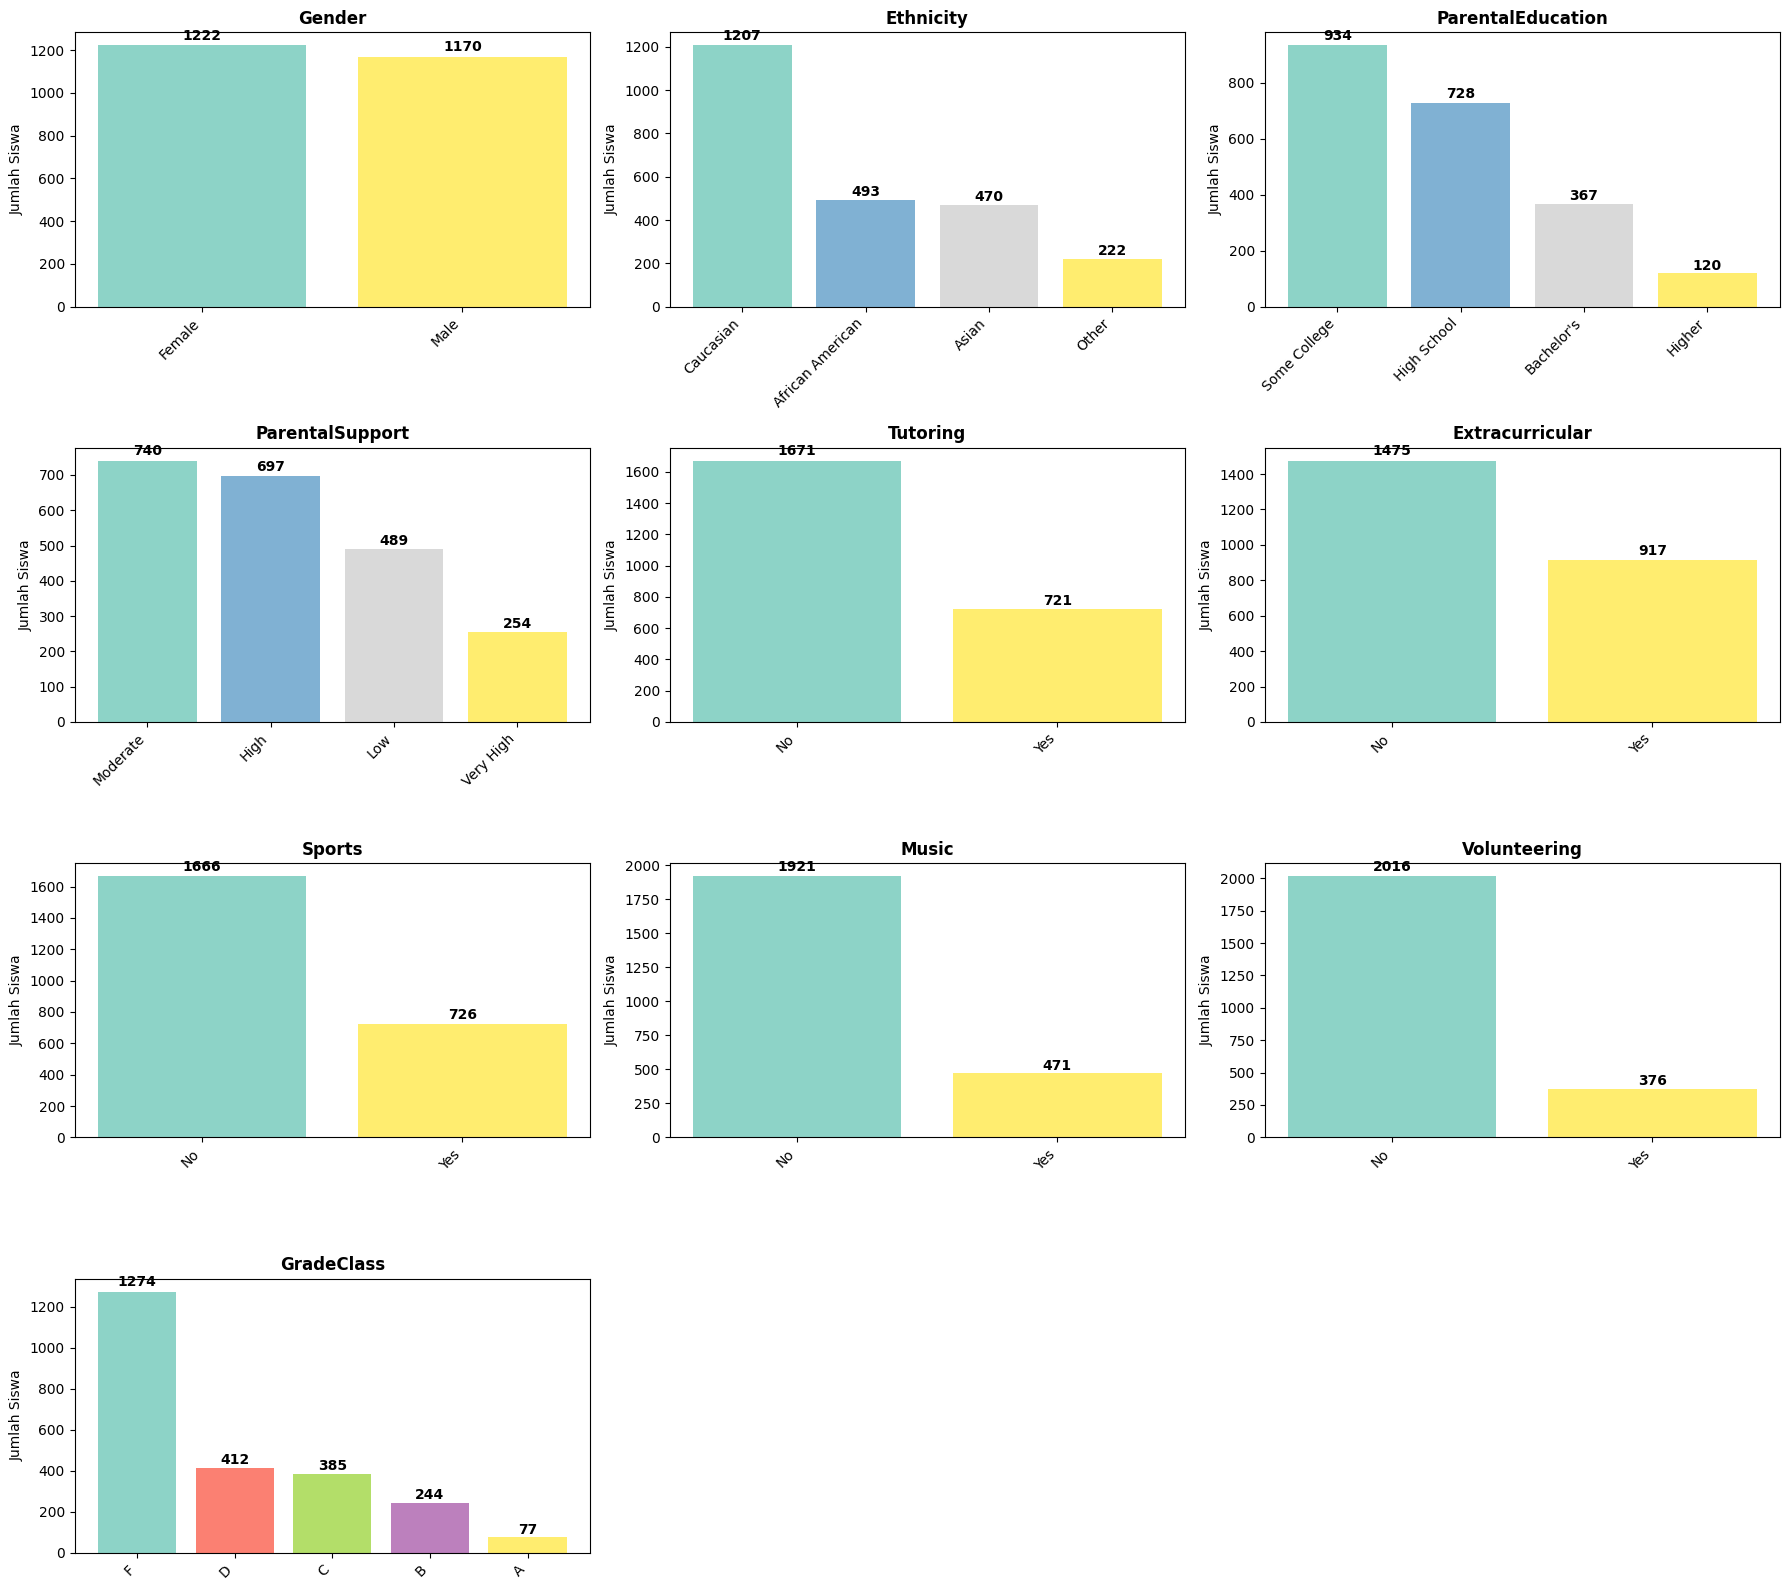

In [14]:
print("\n PERSEBARAN FITUR KATEGORIKAL")
print("=" * 40)

n_categorical = len(categorical_features)
n_cols = 3
n_rows = (n_categorical + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    value_counts = df[feature].value_counts()
    
    # Bar plot
    bars = axes[i].bar(range(len(value_counts)), value_counts.values, 
                      color=plt.cm.Set3(np.linspace(0, 1, len(value_counts))))
    
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Jumlah Siswa')
    axes[i].set_xticks(range(len(value_counts)))
    axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
    

    # Menambahkan nilai diatas bar
    for j, bar in enumerate(bars):
        height = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Hapus subplot kosong 
for i in range(n_categorical, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

##### Fitur vs Target


 VISUALISASI DISTRIBUSI


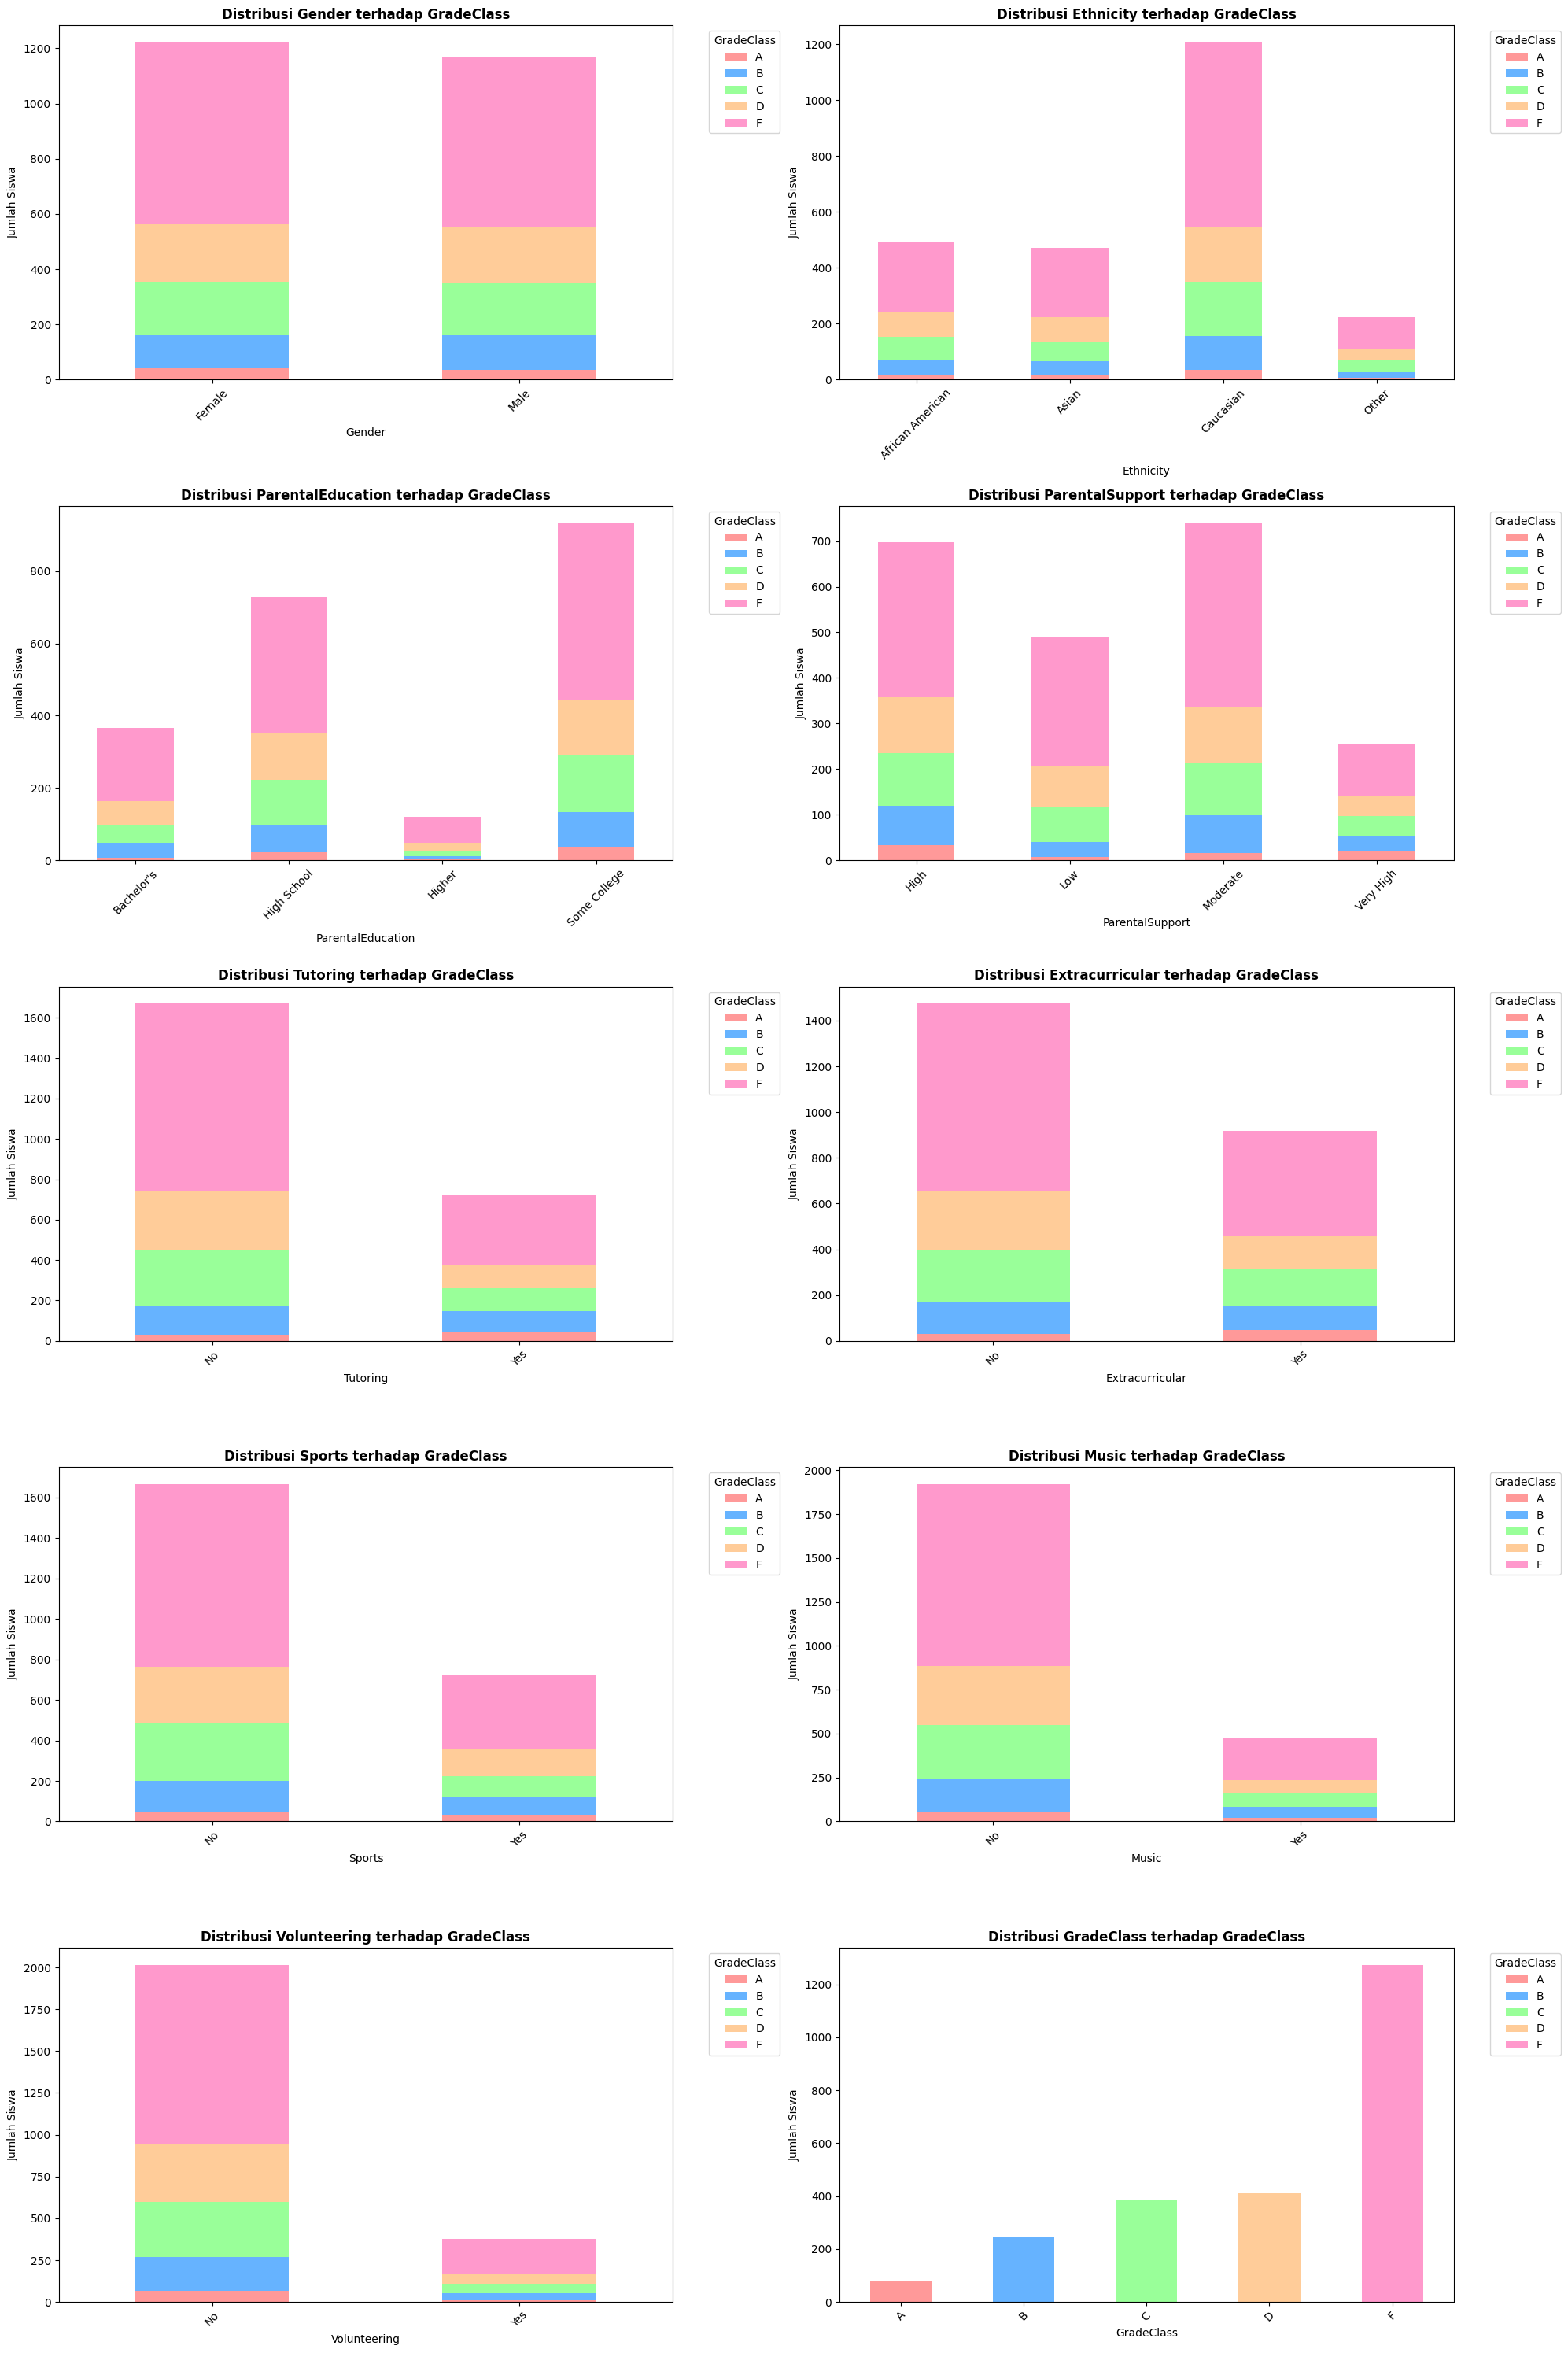

In [15]:
print(f"\n VISUALISASI DISTRIBUSI")
print("=" * 40)

n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Buat crosstab
    crosstab = pd.crosstab(df[feature], df['GradeClass'])
    
    # Stacked bar
    crosstab.plot(kind='bar', stacked=True, ax=axes[i], 
                 color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
    
    axes[i].set_title(f'Distribusi {feature} terhadap GradeClass', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Jumlah Siswa')
    axes[i].legend(title='GradeClass', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].tick_params(axis='x', rotation=45)

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


 VISUALISASI DISTRIBUSI PERSENTASE


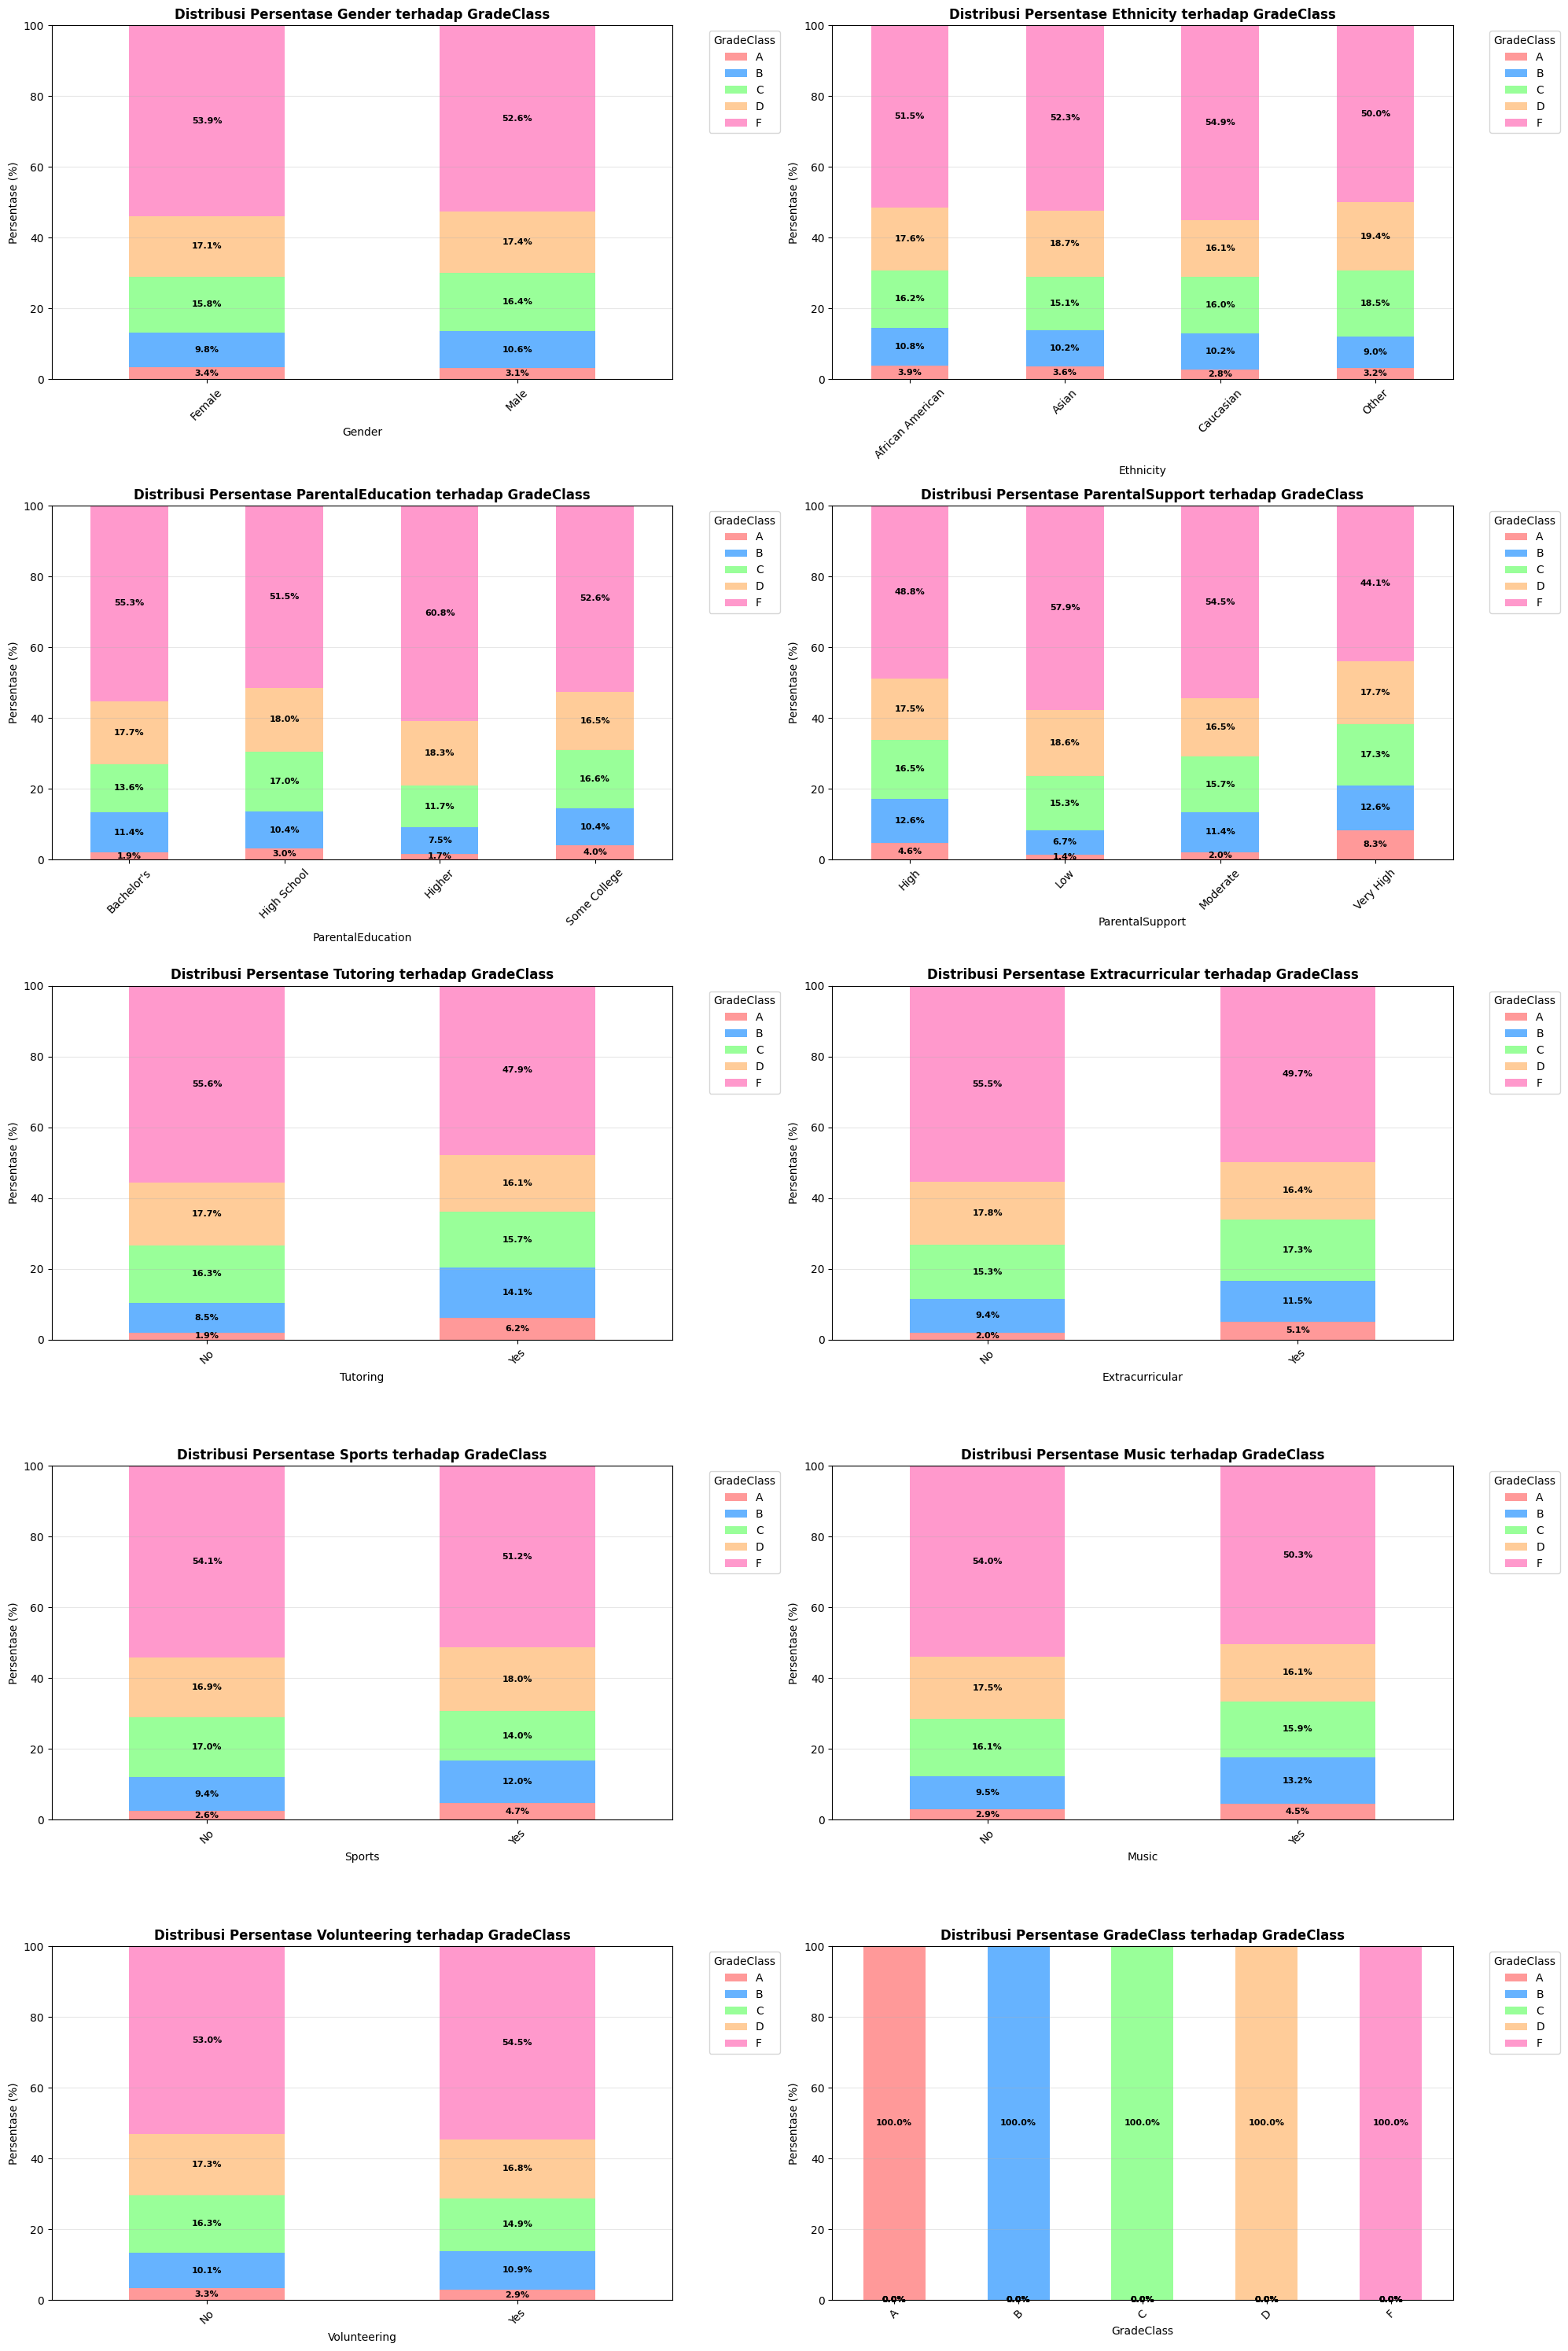

In [16]:
print(f"\n VISUALISASI DISTRIBUSI PERSENTASE")
print("=" * 45)

n_features = len(categorical_features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    # Buat crosstab dengan normalisasi (per kategori feature)
    crosstab_pct = pd.crosstab(df[feature], df['GradeClass'], normalize='index') * 100
    
    # Stacked bar dengan persentase
    crosstab_pct.plot(kind='bar', stacked=True, ax=axes[i], 
                     color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
    
    axes[i].set_title(f'Distribusi Persentase {feature} terhadap GradeClass', 
                     fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Persentase (%)')
    axes[i].legend(title='GradeClass', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_ylim(0, 100)

    axes[i].grid(True, alpha=0.3, axis='y')

    for container in axes[i].containers:
        axes[i].bar_label(container, fmt='%.1f%%', label_type='center', 
                         fontsize=8, fontweight='bold')

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

##### CHI Squared Test


 CHI-SQUARE TEST ANTAR SEMUA FITUR KATEGORIK


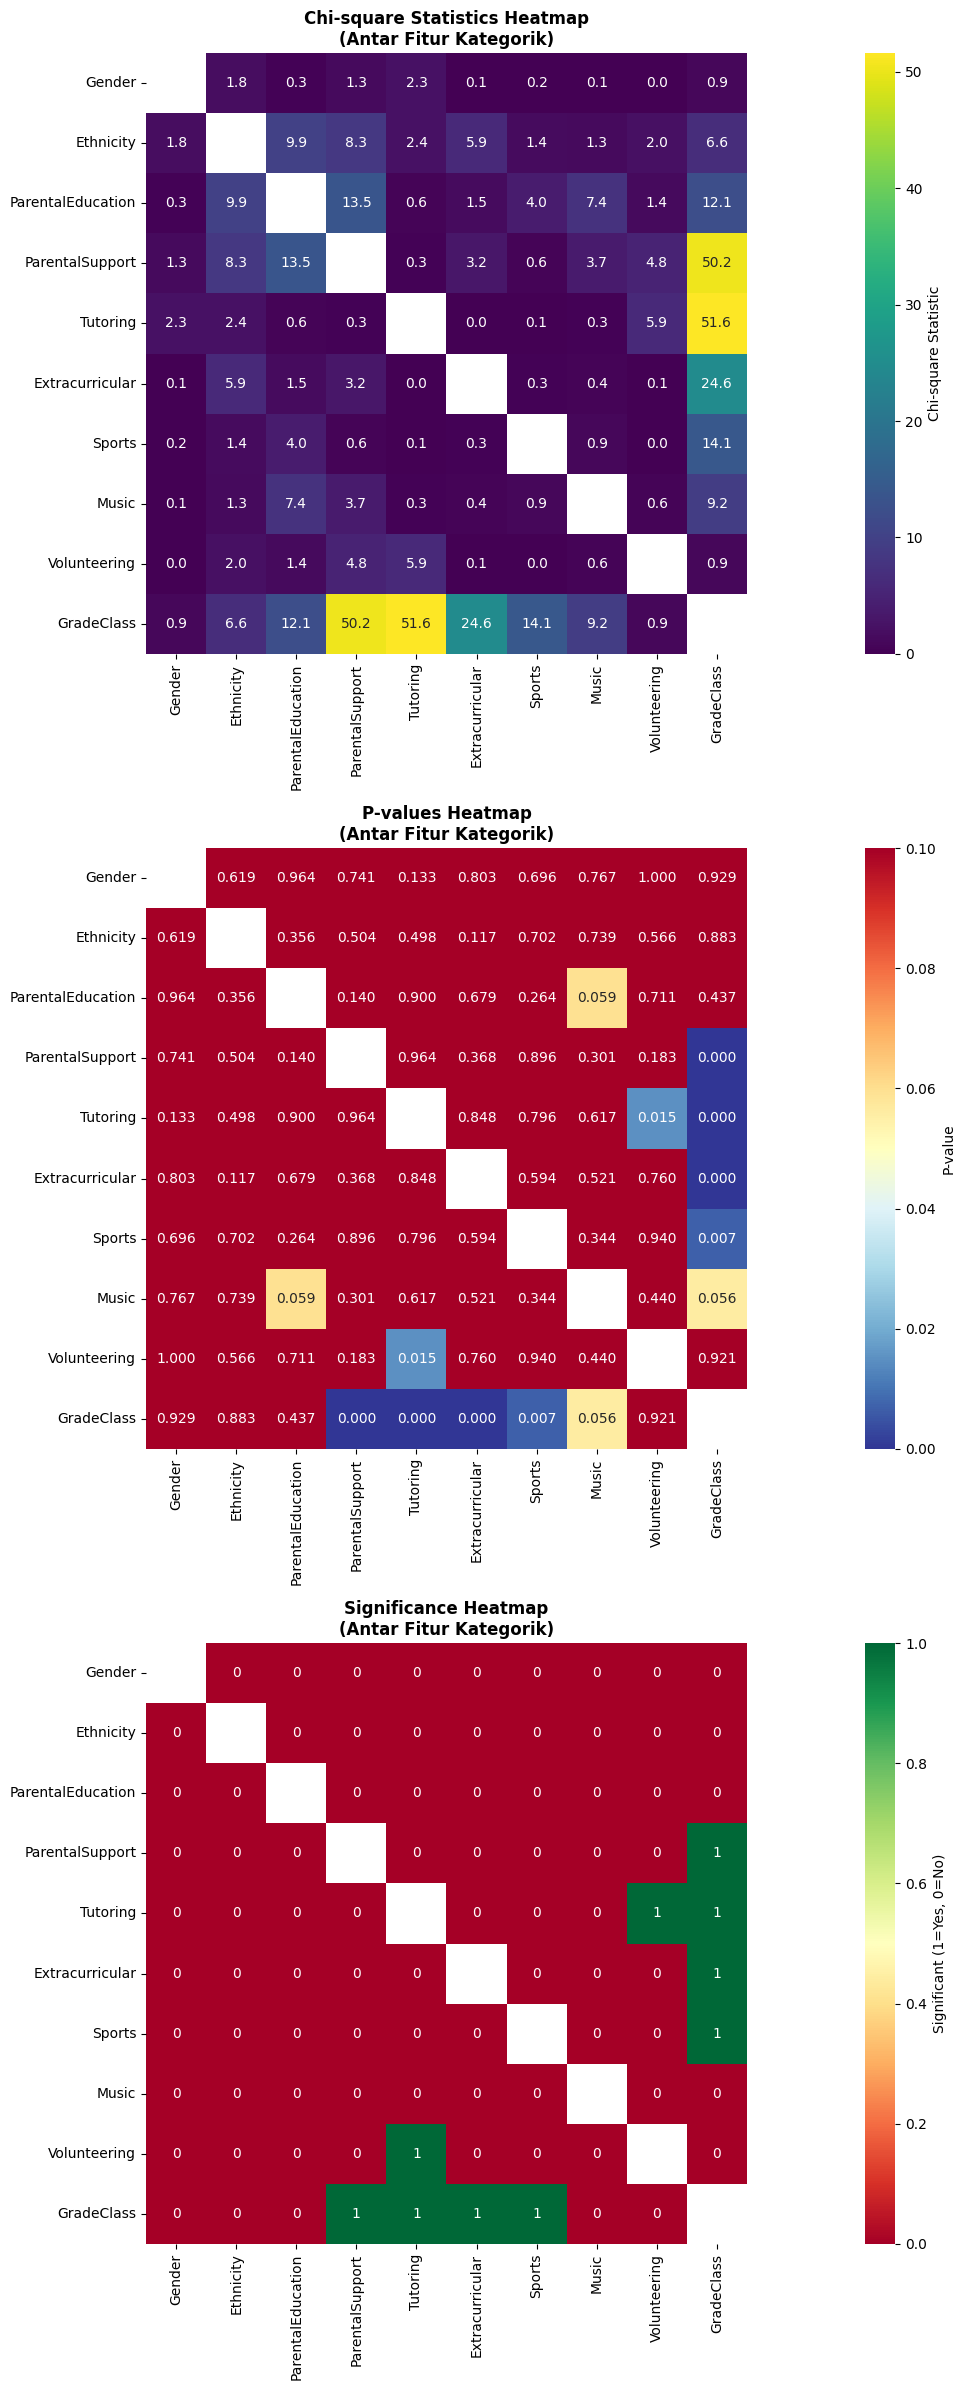

In [17]:
print("\n CHI-SQUARE TEST ANTAR SEMUA FITUR KATEGORIK")
print("=" * 65)

categorical_features_clean = [col for col in categorical_features]

# Matrix untuk menyimpan hasil chi-square
n_features = len(categorical_features_clean)
chi2_matrix = np.zeros((n_features, n_features))
p_value_matrix = np.zeros((n_features, n_features))
significance_matrix = np.zeros((n_features, n_features), dtype=int)  

chi_square_results = {}

for i, feature1 in enumerate(categorical_features_clean):
    chi_square_results[feature1] = {}
    
    for j, feature2 in enumerate(categorical_features_clean):
        if i == j:
            # Diagonal: set nilai 1 untuk chi2 dan 0 untuk p-value
            chi2_matrix[i, j] = 1.0
            p_value_matrix[i, j] = 0.0
            significance_matrix[i, j] = 1
            chi_square_results[feature1][feature2] = {
                'chi2': 1.0,
                'p_value': 0.0,
                'dof': 0,
                'significant': True
            }
        else:
            try:
                # Buat contingency table
                contingency_table = pd.crosstab(df[feature1], df[feature2])
                chi2, p_value, dof, expected = chi2_contingency(contingency_table)

                chi2_matrix[i, j] = chi2
                p_value_matrix[i, j] = p_value
                significance_matrix[i, j] = 1 if p_value < 0.05 else 0
                
                chi_square_results[feature1][feature2] = {
                    'chi2': float(chi2),
                    'p_value': float(p_value),
                    'dof': int(dof),
                    'significant': p_value < 0.05
                }
                
            except Exception as e:
                # Jika ada error, set nilai default
                chi2_matrix[i, j] = 0.0
                p_value_matrix[i, j] = 1.0
                significance_matrix[i, j] = 0
                chi_square_results[feature1][feature2] = {
                    'chi2': 0.0,
                    'p_value': 1.0,
                    'dof': 0,
                    'significant': False
                }

chi2_df = pd.DataFrame(chi2_matrix, 
                       index=categorical_features_clean, 
                       columns=categorical_features_clean)

p_value_df = pd.DataFrame(p_value_matrix, 
                         index=categorical_features_clean, 
                         columns=categorical_features_clean)

significance_df = pd.DataFrame(significance_matrix.astype(int), 
                              index=categorical_features_clean, 
                              columns=categorical_features_clean)

fig, axes = plt.subplots(3, 1, figsize=(24, 24))

# Heatmap 1: Chi-square values
mask_diag = np.eye(len(categorical_features_clean), dtype=bool)
sns.heatmap(chi2_df, 
            annot=True, 
            fmt='.1f', 
            cmap='viridis',
            ax=axes[0],
            mask=mask_diag,
            square=True,
            cbar_kws={'label': 'Chi-square Statistic'})
axes[0].set_title('Chi-square Statistics Heatmap\n(Antar Fitur Kategorik)', 
                  fontsize=12, fontweight='bold')

# Heatmap 2: P-values  
sns.heatmap(p_value_df, 
            annot=True, 
            fmt='.3f', 
            cmap='RdYlBu_r',
            ax=axes[1],
            mask=mask_diag,  
            square=True,
            vmin=0, vmax=0.1,
            cbar_kws={'label': 'P-value'})
axes[1].set_title('P-values Heatmap\n(Antar Fitur Kategorik)', 
                  fontsize=12, fontweight='bold')

# Heatmap 3: Significance (binary)
sns.heatmap(significance_df, 
            annot=True, 
            fmt='d', 
            cmap='RdYlGn',
            ax=axes[2],
            mask=mask_diag,
            square=True,
            cbar_kws={'label': 'Significant (1=Yes, 0=No)'})
axes[2].set_title('Significance Heatmap\n(Antar Fitur Kategorik)', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

##### Anova

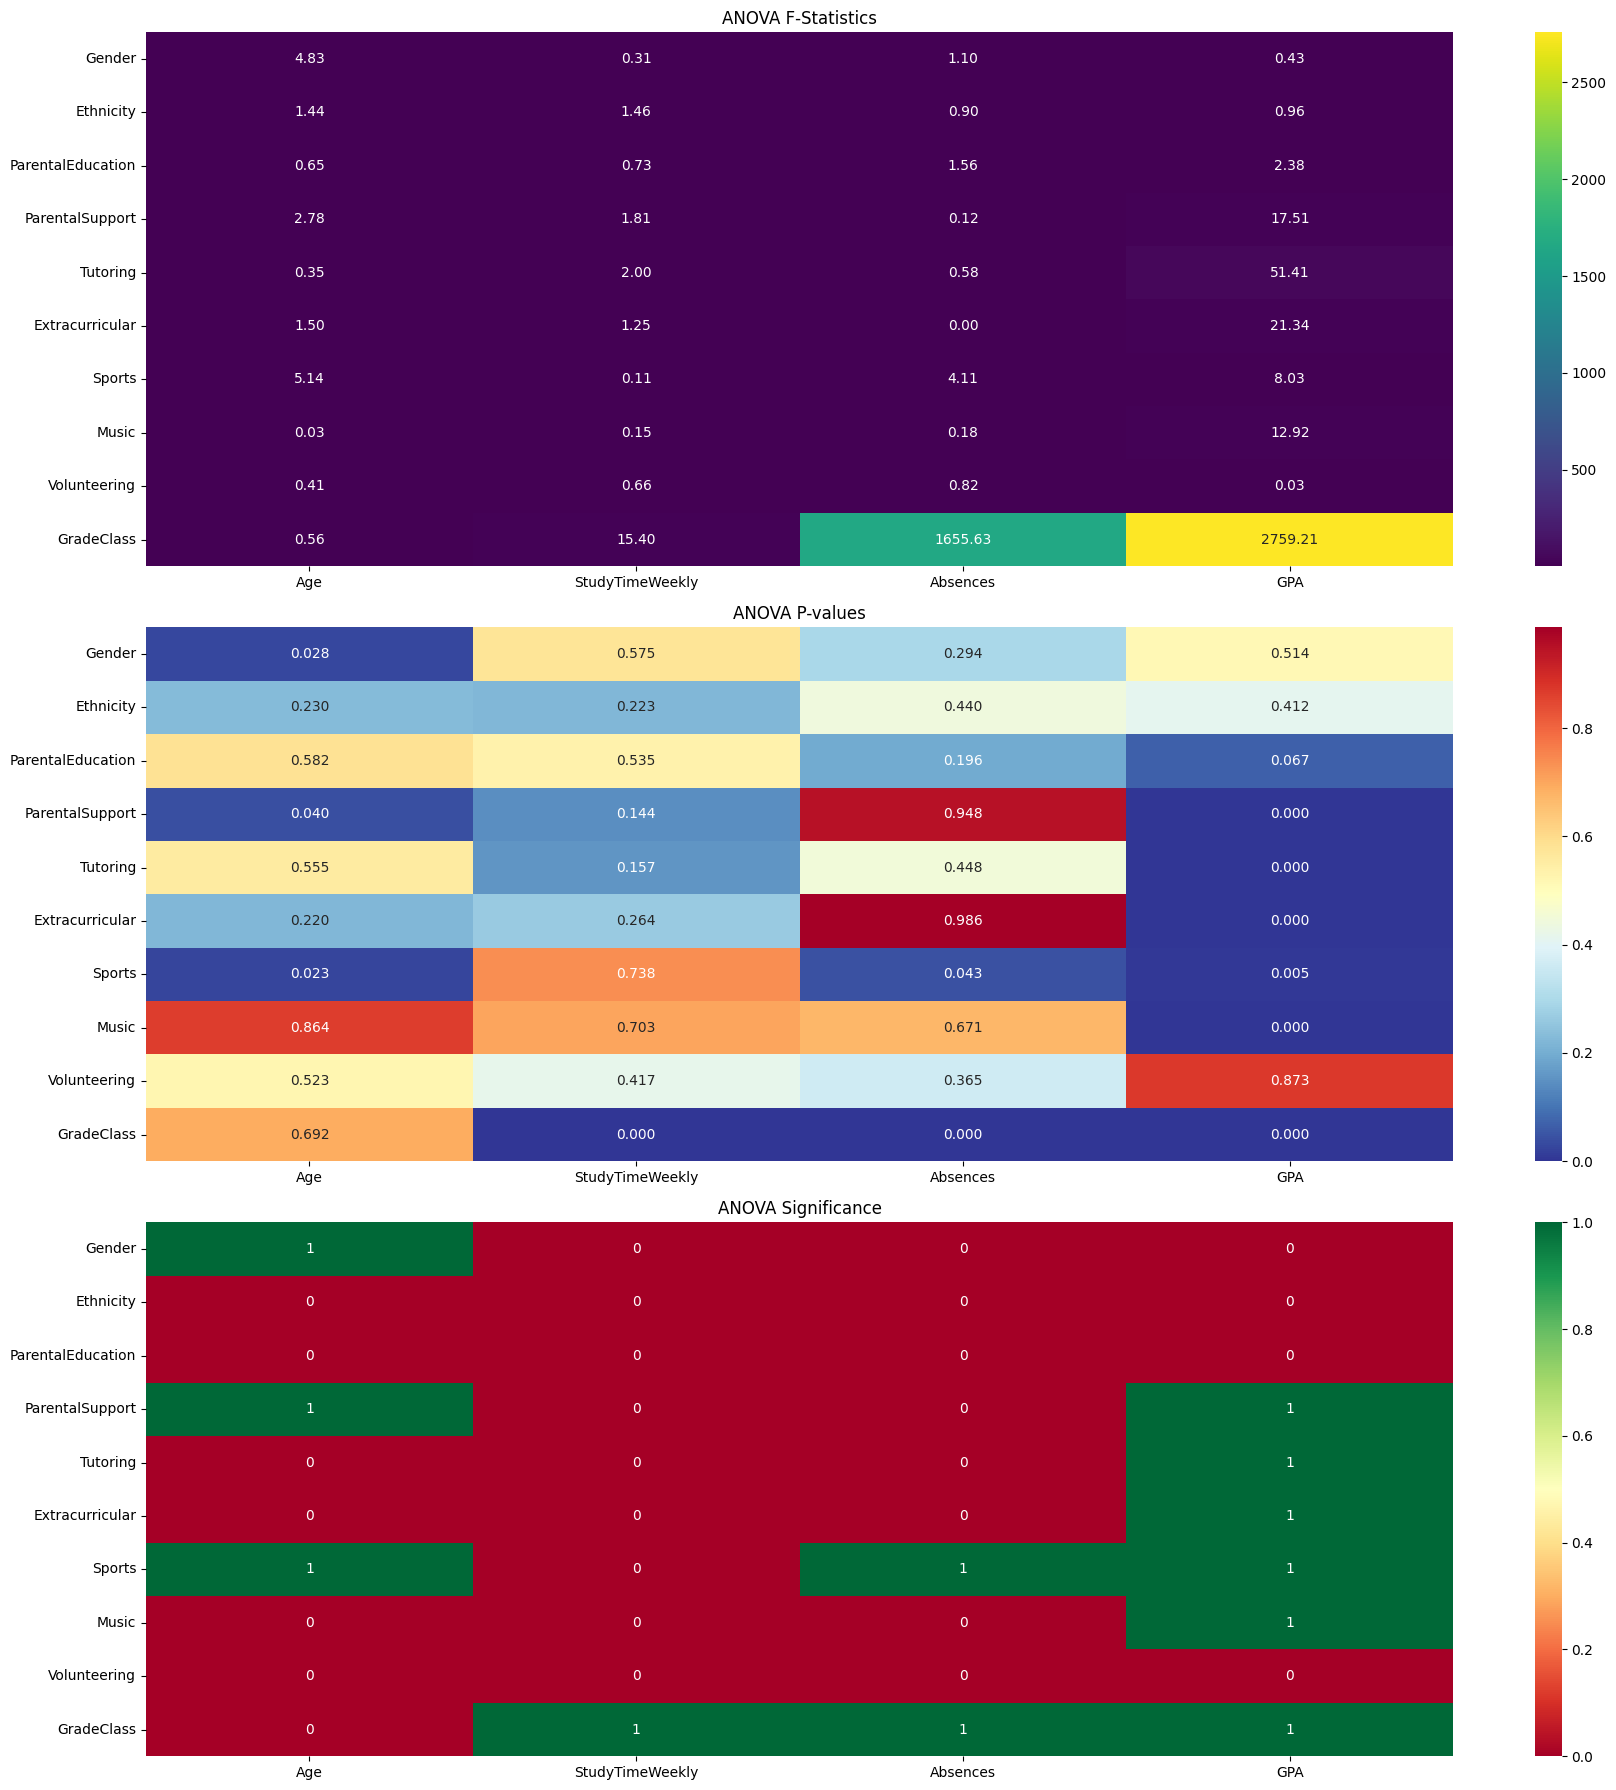

In [18]:
n_cat = len(categorical_features)
n_num = len(numerical_features)

anova_f_matrix = np.zeros((n_cat, n_num))
anova_p_matrix = np.zeros((n_cat, n_num))
anova_significance_matrix = np.zeros((n_cat, n_num), dtype=int)

for i, cat_feature in enumerate(categorical_features):
    for j, num_feature in enumerate(numerical_features):
        try:
            clean_data = df[[cat_feature, num_feature]].dropna()
            
            groups = []
            categories = clean_data[cat_feature].unique()
            
            for category in categories:
                group_data = clean_data[clean_data[cat_feature] == category][num_feature]
                if len(group_data) > 0:
                    groups.append(group_data)
            
            if len(groups) >= 2:
                f_stat, p_value = f_oneway(*groups)
                anova_f_matrix[i, j] = f_stat
                anova_p_matrix[i, j] = p_value
                anova_significance_matrix[i, j] = 1 if p_value < 0.05 else 0
        except:
            anova_f_matrix[i, j] = 0.0
            anova_p_matrix[i, j] = 1.0
            anova_significance_matrix[i, j] = 0

anova_f_df = pd.DataFrame(anova_f_matrix, index=categorical_features, columns=numerical_features)
anova_p_df = pd.DataFrame(anova_p_matrix, index=categorical_features, columns=numerical_features)
anova_significance_df = pd.DataFrame(anova_significance_matrix, index=categorical_features, columns=numerical_features)

fig, axes = plt.subplots(3, 1, figsize=(18, 18))

sns.heatmap(anova_f_df, annot=True, fmt='.2f', cmap='viridis', ax=axes[0])
axes[0].set_title('ANOVA F-Statistics')

sns.heatmap(anova_p_df, annot=True, fmt='.3f', cmap='RdYlBu_r', ax=axes[1])
axes[1].set_title('ANOVA P-values')

sns.heatmap(anova_significance_df, annot=True, fmt='d', cmap='RdYlGn', ax=axes[2])
axes[2].set_title('ANOVA Significance')

plt.tight_layout()
plt.show()

Visualisasi heatmap ini menyajikan ringkasan hasil uji signifikansi ANOVA untuk mengidentifikasi hubungan antara berbagai variabel kategorikal (sumbu Y) dan variabel numerik (sumbu X). Warna hijau (nilai 1) menandakan adanya perbedaan rata-rata yang signifikan secara statistik (p-value < 0.05) antara grup, sementara warna merah (nilai 0) menunjukkan tidak adanya hubungan yang signifikan. Dari analisis ini, terlihat jelas bahwa GPA merupakan variabel numerik yang paling berpengaruh, karena memiliki hubungan signifikan dengan sebagian besar variabel kategorikal seperti ParentalSupport, Tutoring, Extracurricular, dan GradeClass. Sebaliknya, variabel seperti Ethnicity, ParentalEducation, dan Volunteering tidak menunjukkan adanya hubungan signifikan dengan variabel numerik manapun yang diuji.

## Null Values

<Axes: >

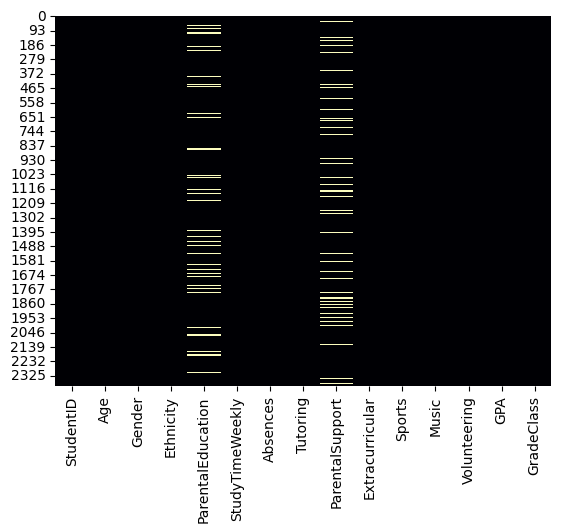

In [19]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

ANALISIS PERSENTASE MISSING VALUES BERDASARKAN GRADECLASS


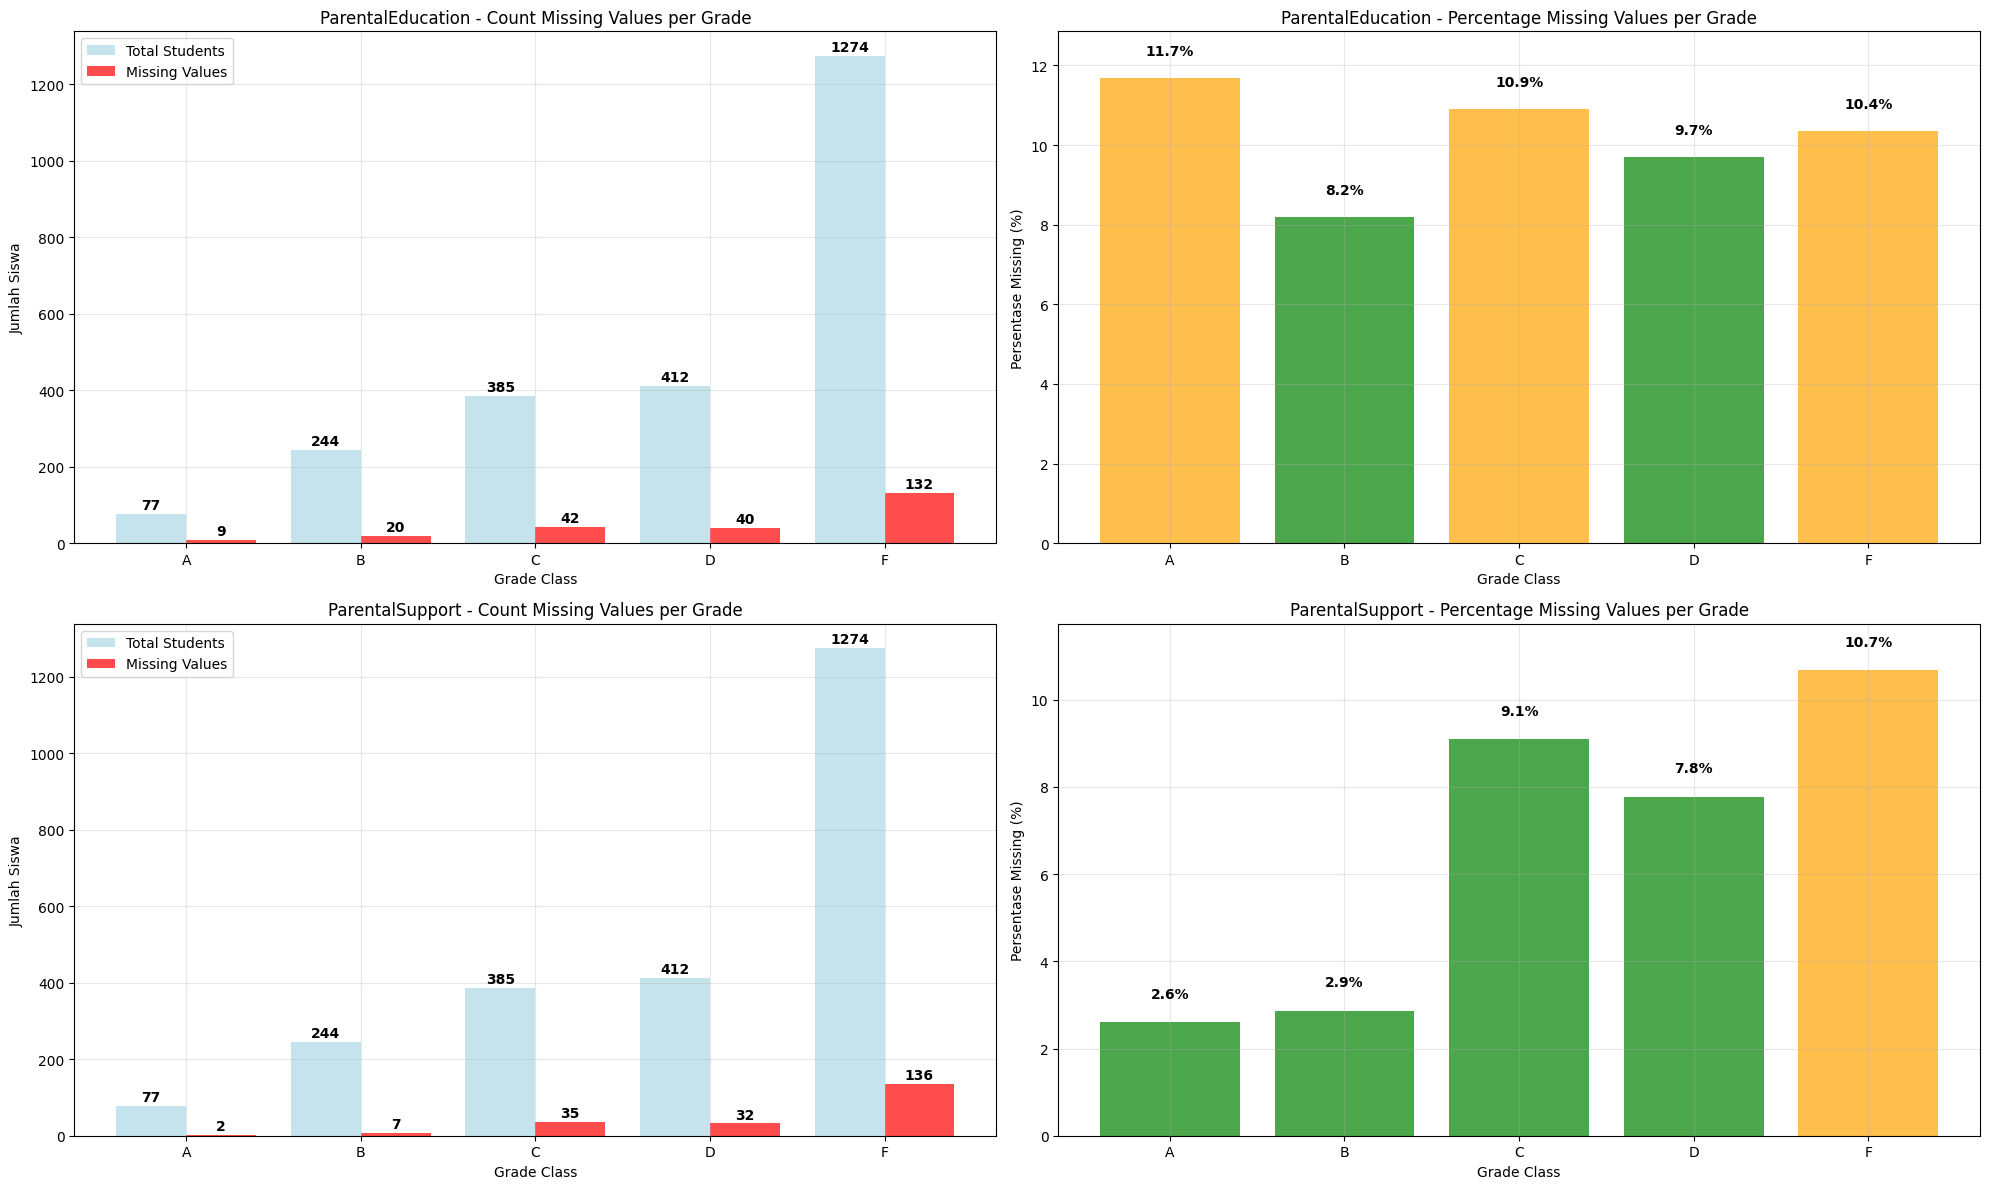

In [20]:
print("ANALISIS PERSENTASE MISSING VALUES BERDASARKAN GRADECLASS")
print("=" * 65)

# Missing Features
missing_features = ['ParentalEducation', 'ParentalSupport']

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for idx, feature in enumerate(missing_features):
    # Hitung missing values per grade
    missing_by_grade = []
    total_by_grade = []
    grades = sorted(df['GradeClass'].unique())
    
    for grade in grades:
        grade_data = df[df['GradeClass'] == grade]
        total_students = len(grade_data)
        missing_count = grade_data[feature].isnull().sum()
        missing_percentage = (missing_count / total_students) * 100 if total_students > 0 else 0
        
        missing_by_grade.append(missing_count)
        total_by_grade.append(total_students)
    
    # Bar chart count
    ax1 = axes[idx, 0]
    x_pos = np.arange(len(grades))
    
    # Bar untuk total dan missing
    bars_total = ax1.bar(x_pos - 0.2, total_by_grade, 0.4, 
                        label='Total Students', color='lightblue', alpha=0.7)
    bars_missing = ax1.bar(x_pos + 0.2, missing_by_grade, 0.4, 
                          label='Missing Values', color='red', alpha=0.7)
    
    ax1.set_xlabel('Grade Class')
    ax1.set_ylabel('Jumlah Siswa')
    ax1.set_title(f'{feature} - Count Missing Values per Grade')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(grades)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # label
    for i, (total, missing) in enumerate(zip(total_by_grade, missing_by_grade)):
        ax1.text(i - 0.2, total + 5, str(total), ha='center', va='bottom', fontweight='bold')
        ax1.text(i + 0.2, missing + 5, str(missing), ha='center', va='bottom', fontweight='bold')
    
    # Bar chart percentage
    ax2 = axes[idx, 1]
    missing_percentages = [(missing/total)*100 if total > 0 else 0 
                          for missing, total in zip(missing_by_grade, total_by_grade)]
    
    bars_pct = ax2.bar(grades, missing_percentages, 
                       color=['green' if pct < 10 else 'orange' if pct < 25 else 'red' 
                             for pct in missing_percentages],
                       alpha=0.7)
    
    ax2.set_xlabel('Grade Class')
    ax2.set_ylabel('Persentase Missing (%)')
    ax2.set_title(f'{feature} - Percentage Missing Values per Grade')
    ax2.set_ylim(0, max(missing_percentages) * 1.1 if missing_percentages else 1)
    ax2.grid(True, alpha=0.3)
    
    # label persentase pada bar
    for bar, pct in zip(bars_pct, missing_percentages):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


Bisa dilihat bahwa baik untuk ParentalSupport dan ParentalEducation mengalami peningkatan missing values seiring dengan semakin rendahnya Grade.

## Data Preprocessing

#### Handling Missing Values - (Stratified Imputation)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

print("Stratified Imputation")
print("=" * 60)

cols_with_missing = df.columns[df.isnull().any()].tolist()
print(f"Kolom dengan missing values: {cols_with_missing}")

df_stratified_imputed = df.copy()

label_encoders = {}

for col in categorical_features:
    le = LabelEncoder()
    non_missing_values = df[col].dropna()
    le.fit(non_missing_values)
    label_encoders[col] = le

def encode_features(data, target_col):
    encoded_data = data.copy()
    
    for col in categorical_features:
        if col != target_col and col in data.columns:
            if col in label_encoders:
                mask = data[col].isin(label_encoders[col].classes_)
                encoded_data.loc[mask, col] = label_encoders[col].transform(data.loc[mask, col])
                if not mask.all():
                    most_frequent = 0
                    encoded_data.loc[~mask, col] = most_frequent
    return encoded_data

for missing_col in cols_with_missing:
    print(f"\nProcessing missing values for: {missing_col}")
    print("-" * 40)
    
    grade_predictions = {}
    
    for grade in df['GradeClass'].unique():
        print(f"  Processing Grade {grade}...")
        
        grade_data = df[df['GradeClass'] == grade].copy()
        missing_in_grade = grade_data[missing_col].isnull().sum()
        
        if missing_in_grade == 0:
            print(f"    No missing values in Grade {grade}")
            continue
        elif missing_in_grade == len(grade_data):
            global_mode = df[missing_col].mode().iloc[0] if not df[missing_col].mode().empty else 'Unknown'
            grade_predictions[grade] = [global_mode] * missing_in_grade
            continue
        
        train_mask = ~grade_data[missing_col].isnull()
        train_data = grade_data[train_mask].copy()
        test_data = grade_data[~train_mask].copy()
        
        if len(train_data) < 2:
            grade_mode = train_data[missing_col].mode().iloc[0] if not train_data[missing_col].mode().empty else 'Unknown'
            grade_predictions[grade] = [grade_mode] * missing_in_grade
            continue
        
        feature_cols = [col for col in df.columns 
                       if col not in ['StudentID', missing_col, 'GradeClass']]
        
        X_train = encode_features(train_data[feature_cols], missing_col)
        y_train = train_data[missing_col]
        X_test = encode_features(test_data[feature_cols], missing_col)
        
        for col in X_train.columns:
            if X_train[col].isnull().any():
                if col in numerical_features:
                    median_val = X_train[col].median()
                    X_train[col].fillna(median_val, inplace=True)
                    X_test[col].fillna(median_val, inplace=True)
                else:
                    mode_val = X_train[col].mode().iloc[0] if not X_train[col].mode().empty else 0
                    X_train[col].fillna(mode_val, inplace=True)
                    X_test[col].fillna(mode_val, inplace=True)
        
        try:
            model = RandomForestClassifier(
                n_estimators=100,
                max_depth=10,
                min_samples_split=5,
                min_samples_leaf=2,
                random_state=42
            )
            
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            grade_predictions[grade] = predictions
            
            print(f"    Predicted {len(predictions)} missing values in Grade {grade}")
            
        except Exception as e:
            print(f"    Error in Grade {grade}: {str(e)}")
            grade_mode = train_data[missing_col].mode().iloc[0] if not train_data[missing_col].mode().empty else 'Unknown'
            grade_predictions[grade] = [grade_mode] * missing_in_grade
    
    for grade in df['GradeClass'].unique():
        if grade in grade_predictions:
            grade_mask = (df['GradeClass'] == grade) & (df[missing_col].isnull())
            grade_indices = df[grade_mask].index
            
            if len(grade_indices) == len(grade_predictions[grade]):
                df_stratified_imputed.loc[grade_indices, missing_col] = grade_predictions[grade]
print("=" * 40)

Stratified Imputation
Kolom dengan missing values: ['ParentalEducation', 'ParentalSupport']

Processing missing values for: ParentalEducation
----------------------------------------
  Processing Grade C...
    Predicted 42 missing values in Grade C
  Processing Grade B...
    Predicted 20 missing values in Grade B
  Processing Grade F...
    Predicted 132 missing values in Grade F
  Processing Grade D...
    Predicted 40 missing values in Grade D
  Processing Grade A...
    Predicted 9 missing values in Grade A

Processing missing values for: ParentalSupport
----------------------------------------
  Processing Grade C...
    Predicted 35 missing values in Grade C
  Processing Grade B...
    Predicted 7 missing values in Grade B
  Processing Grade F...
    Predicted 136 missing values in Grade F
  Processing Grade D...
    Predicted 32 missing values in Grade D
  Processing Grade A...
    Predicted 2 missing values in Grade A


#### Check Inconsistencies, Duplicate 

In [22]:
print("DATA QUALITY CHECK")
print("=" * 40)

# Check GPA vs GradeClass
def check_gpa_grade_consistency(df):
    inconsistent_records = []
    
    for idx, row in df.iterrows():
        gpa = row['GPA']
        grade = row['GradeClass']
        if grade == 'A' and gpa < 3.5:
            inconsistent_records.append(idx)
        elif grade == 'B' and (gpa < 3.0 or gpa >= 3.5):
            inconsistent_records.append(idx)
        elif grade == 'C' and (gpa < 2.5 or gpa >= 3.0):
            inconsistent_records.append(idx)
        elif grade == 'D' and (gpa < 2.0 or gpa >= 2.5):
            inconsistent_records.append(idx)
        elif grade == 'F' and gpa >= 2.0:
            inconsistent_records.append(idx)
    
    return inconsistent_records

# Check inconsistencies in original data
inconsistent_original = check_gpa_grade_consistency(df)
print(f"Inconsistent GPA-Grade records in original data: {len(inconsistent_original)}")

if len(inconsistent_original) > 0:
    print("Sample inconsistent records:")
    print(df.loc[inconsistent_original[:5], ['StudentID', 'GPA', 'GradeClass']])

# Check inconsistencies in imputed data
inconsistent_imputed = check_gpa_grade_consistency(df_stratified_imputed)
print(f"Inconsistent GPA-Grade records in imputed data: {len(inconsistent_imputed)}")

# Check duplicates
print(f"\nDuplicate records in original data: {df.duplicated().sum()}")
print(f"Duplicate records in imputed data: {df_stratified_imputed.duplicated().sum()}")

# Check for duplicate StudentIDs
print(f"Duplicate StudentIDs in original data: {df['StudentID'].duplicated().sum()}")
print(f"Duplicate StudentIDs in imputed data: {df_stratified_imputed['StudentID'].duplicated().sum()}")

# Verify missing values are filled
print(f"\nMissing values in original data:")
print(df.isnull().sum()[df.isnull().sum() > 0])

print(f"\nMissing values in imputed data:")
print(df_stratified_imputed.isnull().sum()[df_stratified_imputed.isnull().sum() > 0])

DATA QUALITY CHECK
Inconsistent GPA-Grade records in original data: 0
Inconsistent GPA-Grade records in imputed data: 0

Duplicate records in original data: 0
Duplicate records in imputed data: 0
Duplicate StudentIDs in original data: 0
Duplicate StudentIDs in imputed data: 0

Missing values in original data:
ParentalEducation    243
ParentalSupport      212
dtype: int64

Missing values in imputed data:
Series([], dtype: int64)


## Data Transformation and Feature Selection

In [23]:
df_stratified_imputed = df_stratified_imputed.drop(columns=['StudentID', 'GPA'], errors='ignore')

In [24]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_stratified_imputed.copy()
scaler = StandardScaler()
numerical_features_to_scale = ['Age', 'StudyTimeWeekly', 'Absences']

print(f"Fitur numerik yang akan distandarisasi: {numerical_features_to_scale}")

# statistik sebelum scaling
print("\nStatistik sebelum scaling:")
print(df_scaled[numerical_features_to_scale].describe())

# scaling
df_scaled[numerical_features_to_scale] = scaler.fit_transform(df_scaled[numerical_features_to_scale])

# statistik setelah scaling
print("\nStatistik setelah scaling:")
print(df_scaled[numerical_features_to_scale].describe())

Fitur numerik yang akan distandarisasi: ['Age', 'StudyTimeWeekly', 'Absences']

Statistik sebelum scaling:
               Age  StudyTimeWeekly     Absences
count  2392.000000      2392.000000  2392.000000
mean     16.468645         9.771992    14.541388
std       1.123798         5.652774     8.467417
min      15.000000         0.001057     0.000000
25%      15.000000         5.043079     7.000000
50%      16.000000         9.705363    15.000000
75%      17.000000        14.408410    22.000000
max      18.000000        19.978094    29.000000

Statistik setelah scaling:
                Age  StudyTimeWeekly      Absences
count  2.392000e+03     2.392000e+03  2.392000e+03
mean   8.406505e-16     1.203051e-16  8.911489e-18
std    1.000209e+00     1.000209e+00  1.000209e+00
min   -1.307132e+00    -1.728882e+00 -1.717694e+00
25%   -1.307132e+00    -8.367399e-01 -8.908224e-01
50%   -4.171064e-01    -1.178937e-02  5.417330e-02
75%    4.729190e-01     8.203737e-01  8.810445e-01
max    1.362944e

In [25]:
print("LABEL ENCODING FITUR KATEGORIK")
print("=" * 40)

df_encoded = df_scaled.copy()
mappings = {
    'Gender': {'Male': 0, 'Female': 1},
    'Ethnicity': {'Caucasian': 0, 'African American': 1, 'Asian': 2, 'Other': 3},
    'ParentalEducation': {'None': 0, 'High School': 1, 'Some College': 2, "Bachelor's": 3, 'Higher': 4},
    'ParentalSupport': {'None': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'Very High': 4},
    'Tutoring': {'No': 0, 'Yes': 1},
    'Extracurricular': {'No': 0, 'Yes': 1},
    'Sports': {'No': 0, 'Yes': 1},
    'Music': {'No': 0, 'Yes': 1},
    'Volunteering': {'No': 0, 'Yes': 1},
    'GradeClass': {'A': 5, 'B': 4, 'C': 3, 'D': 2, 'E': 1, 'F': 0},
}

for feature, mapping in mappings.items():
    if feature in df_encoded.columns:
        print(f"Encoding {feature}:")
        print(f"  Original values: {df_encoded[feature].unique()}")
        df_encoded[feature] = df_encoded[feature].map(mapping)
        print(f"  Encoded values: {df_encoded[feature].unique()}")
        print()

print("Tipe data setelah encoding:")
print(df_encoded.dtypes)

LABEL ENCODING FITUR KATEGORIK
Encoding Gender:
  Original values: ['Female' 'Male']
  Encoded values: [1 0]

Encoding Ethnicity:
  Original values: ['Caucasian' 'Asian' 'African American' 'Other']
  Encoded values: [0 2 1 3]

Encoding ParentalEducation:
  Original values: ['Some College' 'High School' "Bachelor's" 'Higher']
  Encoded values: [2 1 3 4]

Encoding ParentalSupport:
  Original values: ['Moderate' 'Low' 'High' 'Very High']
  Encoded values: [2 1 3 4]

Encoding Tutoring:
  Original values: ['Yes' 'No']
  Encoded values: [1 0]

Encoding Extracurricular:
  Original values: ['No' 'Yes']
  Encoded values: [0 1]

Encoding Sports:
  Original values: ['No' 'Yes']
  Encoded values: [0 1]

Encoding Music:
  Original values: ['Yes' 'No']
  Encoded values: [1 0]

Encoding Volunteering:
  Original values: ['No' 'Yes']
  Encoded values: [0 1]

Encoding GradeClass:
  Original values: ['C' 'B' 'F' 'D' 'A']
  Encoded values: [3 4 0 2 5]

Tipe data setelah encoding:
Age                  floa

In [26]:
selected_features = ['ParentalSupport', 'Tutoring', 'Extracurricular', 'Sports', 'StudyTimeWeekly', 'Absences', 'GradeClass']

df_selected = df_encoded[selected_features].copy()

In [27]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ParentalSupport  2392 non-null   int64  
 1   Tutoring         2392 non-null   int64  
 2   Extracurricular  2392 non-null   int64  
 3   Sports           2392 non-null   int64  
 4   StudyTimeWeekly  2392 non-null   float64
 5   Absences         2392 non-null   float64
 6   GradeClass       2392 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 130.9 KB


## Modelling

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df_selected.drop('GradeClass', axis=1)
y = df_selected['GradeClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### KNN

In [29]:
# SKLEARN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7265

Confusion Matrix:
[[236  12   1   0   0]
 [ 27  43  13   2   0]
 [  3  23  42  11   1]
 [  0   3  22  22   2]
 [  0   0   2   9   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       249
           2       0.53      0.51      0.52        85
           3       0.53      0.53      0.53        80
           4       0.50      0.45      0.47        49
           5       0.62      0.31      0.42        16

    accuracy                           0.73       479
   macro avg       0.61      0.55      0.57       479
weighted avg       0.72      0.73      0.72       479



In [30]:
# myKNN
from supervised_learning.KNN import myKNN
knnClassifier = myKNN()
knnClassifier.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred = knnClassifier.predict(X_test.to_numpy())

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7390

Confusion Matrix:
[[234  14   1   0   0]
 [ 23  46  14   2   0]
 [  2  17  46  14   1]
 [  0   2  20  23   4]
 [  0   0   2   9   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       249
           2       0.58      0.54      0.56        85
           3       0.55      0.57      0.56        80
           4       0.48      0.47      0.47        49
           5       0.50      0.31      0.38        16

    accuracy                           0.74       479
   macro avg       0.60      0.57      0.58       479
weighted avg       0.73      0.74      0.73       479



#### Softmax Regression

In [31]:
from sklearn.linear_model import LogisticRegression

softmax_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42, max_iter=1000)
softmax_model.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred = softmax_model.predict(X_test.to_numpy())

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8058

Confusion Matrix:
[[238  11   0   0   0]
 [ 16  56  13   0   0]
 [  0  15  54  11   0]
 [  0   0  13  35   1]
 [  0   0   0  13   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       249
           2       0.68      0.66      0.67        85
           3       0.68      0.68      0.68        80
           4       0.59      0.71      0.65        49
           5       0.75      0.19      0.30        16

    accuracy                           0.81       479
   macro avg       0.73      0.64      0.65       479
weighted avg       0.81      0.81      0.80       479



In [32]:
# myRegression

from supervised_learning.Regression import mySoftmaxRegression

mysoftmax_model = mySoftmaxRegression(optimizer='newton',lambda_param=0.01, regularization='l2', n_iters=1000)
mysoftmax_model.fit(X_train, y_train)

y_pred = mysoftmax_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Iterasi 0: Loss = 1.609438
Iterasi 100: Loss = 0.823048
Iterasi 200: Loss = 0.627915
Iterasi 300: Loss = 0.528669
Iterasi 400: Loss = 0.474929
Iterasi 500: Loss = 0.446171
Iterasi 600: Loss = 0.430729
Iterasi 700: Loss = 0.421930
Iterasi 800: Loss = 0.416567
Iterasi 900: Loss = 0.413140
Accuracy: 0.8121

Confusion Matrix:
[[237  12   0   0   0]
 [ 15  56  14   0   0]
 [  0  14  53  13   0]
 [  0   0  12  35   2]
 [  0   0   0   8   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       249
           2       0.68      0.66      0.67        85
           3       0.67      0.66      0.67        80
           4       0.62      0.71      0.67        49
           5       0.80      0.50      0.62        16

    accuracy                           0.81       479
   macro avg       0.74      0.70      0.71       479
weighted avg       0.81      0.81      0.81       479



#### Gaussian NB

In [33]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7307

Confusion Matrix:
[[230  17   2   0   0]
 [ 22  39  24   0   0]
 [  0  21  47  12   0]
 [  0   2  16  31   0]
 [  0   0   0  13   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       249
           2       0.49      0.46      0.48        85
           3       0.53      0.59      0.56        80
           4       0.55      0.63      0.59        49
           5       1.00      0.19      0.32        16

    accuracy                           0.73       479
   macro avg       0.70      0.56      0.57       479
weighted avg       0.74      0.73      0.73       479



In [34]:
# myGaussianNB

from supervised_learning.GaussianNB import myGaussianNaiveBayes

mynb_model = myGaussianNaiveBayes()
mynb_model.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred = mynb_model.predict(X_test.to_numpy())

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7307

Confusion Matrix:
[[230  17   2   0   0]
 [ 22  39  24   0   0]
 [  0  21  47  12   0]
 [  0   2  16  31   0]
 [  0   0   0  13   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       249
           2       0.49      0.46      0.48        85
           3       0.53      0.59      0.56        80
           4       0.55      0.63      0.59        49
           5       1.00      0.19      0.32        16

    accuracy                           0.73       479
   macro avg       0.70      0.56      0.57       479
weighted avg       0.74      0.73      0.73       479



#### CART

In [35]:
from sklearn.tree import DecisionTreeClassifier

cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

y_pred = cart_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.7390

Confusion Matrix:
[[226  23   0   0   0]
 [ 20  46  15   4   0]
 [  0  16  49  14   1]
 [  0   1  14  27   7]
 [  0   0   2   8   6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       249
           2       0.53      0.54      0.54        85
           3       0.61      0.61      0.61        80
           4       0.51      0.55      0.53        49
           5       0.43      0.38      0.40        16

    accuracy                           0.74       479
   macro avg       0.60      0.60      0.60       479
weighted avg       0.74      0.74      0.74       479



In [36]:
# myCART

from supervised_learning.CART import myDecisionTree

mycart_model = myDecisionTree()
mycart_model.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred = mycart_model.predict(X_test.to_numpy())

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7411

Confusion Matrix:
[[228  20   1   0   0]
 [ 19  47  16   3   0]
 [  0  20  45  15   0]
 [  0   1  15  28   5]
 [  0   0   2   7   7]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       249
           2       0.53      0.55      0.54        85
           3       0.57      0.56      0.57        80
           4       0.53      0.57      0.55        49
           5       0.58      0.44      0.50        16

    accuracy                           0.74       479
   macro avg       0.63      0.61      0.62       479
weighted avg       0.74      0.74      0.74       479



#### SVC

In [37]:
#SKLEARN
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7975

Confusion Matrix:
[[239  10   0   0   0]
 [ 20  51  14   0   0]
 [  0  13  57  10   0]
 [  0   0  16  33   0]
 [  0   0   2  12   2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       249
           2       0.69      0.60      0.64        85
           3       0.64      0.71      0.67        80
           4       0.60      0.67      0.63        49
           5       1.00      0.12      0.22        16

    accuracy                           0.80       479
   macro avg       0.77      0.61      0.62       479
weighted avg       0.80      0.80      0.79       479



In [38]:
# mySVM
from supervised_learning.SVM import mySVM 

mysvm_model = mySVM(kernel='rbf')
mysvm_model.fit(X_train.to_numpy(), y_train.to_numpy())

y_pred = mysvm_model.predict(X_test.to_numpy())

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Training classifier untuk kelas 0 (1/5)
Training classifier untuk kelas 2 (2/5)
Training classifier untuk kelas 3 (3/5)
Training classifier untuk kelas 4 (4/5)
Training classifier untuk kelas 5 (5/5)
Accuracy: 0.7432

Confusion Matrix:
[[236  12   1   0   0]
 [ 30  38  17   0   0]
 [  9  13  47  11   0]
 [  5   0  12  32   0]
 [  0   0   1  12   3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       249
           2       0.60      0.45      0.51        85
           3       0.60      0.59      0.59        80
           4       0.58      0.65      0.62        49
           5       1.00      0.19      0.32        16

    accuracy                           0.74       479
   macro avg       0.73      0.56      0.59       479
weighted avg       0.74      0.74      0.73       479

